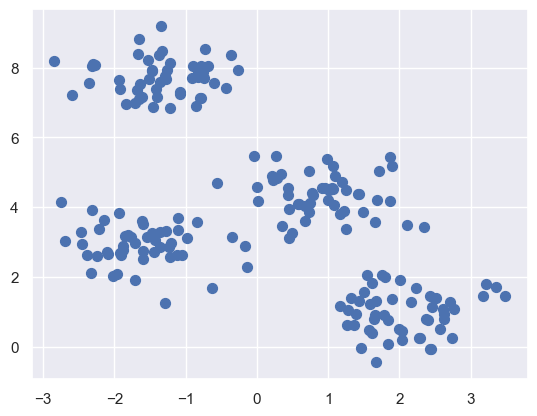

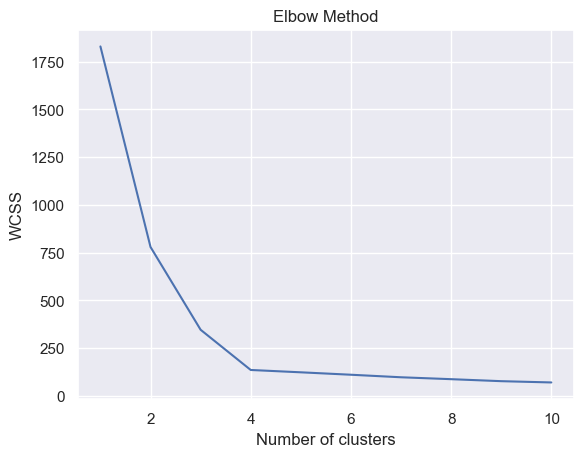

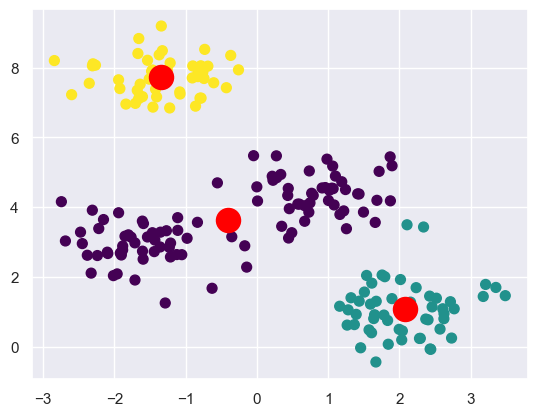

In [147]:
import numpy as np 

import pandas as pd 

import matplotlib.pyplot as plt

import seaborn as sns

sns.set()

from sklearn.cluster import KMeans

from sklearn.datasets import make_blobs
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

X, y = make_blobs(n_samples=200, centers=4, cluster_std=0.60, random_state=0)

plt.scatter(X[:,0], X[:,1], s=50)

plt.show()

wcss = []

for i in range(1, 11):

    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)

    kmeans.fit(X)

    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)

plt.title('Elbow Method')

plt.xlabel('Number of clusters')

plt.ylabel('WCSS')

plt.show()

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)

y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], s=50, c=y_kmeans, cmap='viridis')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')

plt.show()



In [148]:
import requests as re
data=pd.read_csv('data/2023 Global Country Development/data.csv')
data.head()

Country  AveragScore  SafetySecurity  PersonelFreedom  Governance  \
0        Denmark        84.55           92.59            94.09       89.45   
1         Sweden        83.67           90.97            91.90       86.41   
2         Norway        83.59           93.30            94.10       89.66   
3        Finland        83.47           89.56            91.96       90.41   
4    Switzerland        83.42           95.66            87.50       87.67   

   SocialCapital  InvestmentEnvironment  EnterpriseConditions  \
0          82.56                  82.42                 79.64   
1          78.29                  82.81                 75.54   
2          79.03                  82.24                 75.95   
3          77.27                  84.12                 77.25   
4          69.14                  80.81                 83.84   

   MarketAccessInfrastructure  EconomicQuality  LivingConditions  Health  \
0                       78.79            76.81             95.77   81.07   
1                       79.67            76.18             95.33   82.28   
2                       75.87            77.25             94.70   82.98   
3                       78.77            70.28             94.46   81.19   
4                       78.65            79.71             94.66   82.11   

   Education  NaturalEnvironment  
0      87.48               73.94  
1      85.92               78.74  
2      85.68               72.37  
3      88.38               77.99  
4      87.72               73.60

In [149]:
data['Country'].unique()

array(['\xa0Denmark', '\xa0Sweden', '\xa0Norway', '\xa0Finland',
       '\xa0\xa0Switzerland', '\xa0Netherlands', '\xa0Luxembourg',
       '\xa0Iceland', '\xa0Germany', '\xa0New Zealand', '\xa0Ireland',
       '\xa0United Kingdom', '\xa0Canada', '\xa0Austria', '\xa0Australia',
       '\xa0Japan', '\xa0Singapore', '\xa0Belgium', '\xa0United States',
       '\xa0Taiwan', '\xa0Estonia', '\xa0Hong Kong', '\xa0France',
       '\xa0Spain', '\xa0Czech Republic', '\xa0Portugal', '\xa0Slovenia',
       '\xa0Malta', '\xa0South Korea', '\xa0Italy', '\xa0Latvia',
       '\xa0Lithuania', '\xa0Israel', '\xa0Cyprus', '\xa0Slovakia',
       '\xa0Chile', '\xa0Poland', '\xa0Uruguay', '\xa0Costa Rica',
       '\xa0Greece', '\xa0Croatia', '\xa0Hungary', '\xa0Malaysia',
       '\xa0United Arab Emirates', '\xa0Romania', '\xa0Qatar',
       '\xa0Mauritius', '\xa0Bulgaria', '\xa0Montenegro', '\xa0Panama',
       '\xa0Seychelles', '\xa0Serbia', '\xa0Georgia', '\xa0China',
       '\xa0Macedonia', '\xa0Trinidad 

In [150]:
data.isnull().sum()

Country                       0
AveragScore                   0
SafetySecurity                0
PersonelFreedom               0
Governance                    0
SocialCapital                 0
InvestmentEnvironment         0
EnterpriseConditions          0
MarketAccessInfrastructure    0
EconomicQuality               0
LivingConditions              0
Health                        0
Education                     0
NaturalEnvironment            0
dtype: int64

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     167 non-null    object 
 1   AveragScore                 167 non-null    float64
 2   SafetySecurity              167 non-null    float64
 3   PersonelFreedom             167 non-null    float64
 4   Governance                  167 non-null    float64
 5   SocialCapital               167 non-null    float64
 6   InvestmentEnvironment       167 non-null    float64
 7   EnterpriseConditions        167 non-null    float64
 8   MarketAccessInfrastructure  167 non-null    float64
 9   EconomicQuality             167 non-null    float64
 10  LivingConditions            167 non-null    float64
 11  Health                      167 non-null    float64
 12  Education                   167 non-null    float64
 13  NaturalEnvironment          167 non

In [152]:
data.size

2338

In [153]:
data.describe()

AveragScore  SafetySecurity  PersonelFreedom  Governance  \
count   167.000000      167.000000       167.000000  167.000000   
mean     58.056228       67.242515        56.829401   50.360299   
std      13.309964       17.542279        19.914638   17.747092   
min      30.400000       16.540000        16.160000   13.090000   
25%      47.770000       59.290000        39.650000   37.470000   
50%      57.530000       68.930000        57.170000   47.510000   
75%      66.860000       80.560000        72.865000   60.965000   
max      84.550000       96.320000        94.100000   90.410000   

       SocialCapital  InvestmentEnvironment  EnterpriseConditions  \
count     167.000000             167.000000            167.000000   
mean       54.468024              53.013653             54.791677   
std        10.350639              16.743723             12.876166   
min        23.010000              21.690000             20.500000   
25%        47.820000              40.765000             45.830000   
50%        54.390000              51.250000             53.520000   
75%        60.610000              64.640000             62.760000   
max        82.560000              84.990000             83.840000   

       MarketAccessInfrastructure  EconomicQuality  LivingConditions  \
count                  167.000000       167.000000        167.000000   
mean                    55.019701        51.568683         69.803293   
std                     15.849004        13.427811         19.752677   
min                     24.230000        24.460000         19.210000   
25%                     40.055000        41.295000         55.830000   
50%                     56.590000        50.060000         74.770000   
75%                     69.060000        62.555000         86.975000   
max                     85.750000        80.100000         95.860000   

           Health   Education  NaturalEnvironment  
count  167.000000  167.000000          167.000000  
mean    68.624910   58.723772           56.231737  
std     11.166266   19.679023            9.061262  
min     31.950000   16.780000           33.670000  
25%     60.595000   44.355000           50.265000  
50%     71.380000   61.930000           55.540000  
75%     77.340000   74.130000           61.940000  
max     86.890000   91.440000           78.740000

In [154]:
data1 = data
data1.drop(columns='Country',axis=1).corr()

AveragScore  SafetySecurity  PersonelFreedom  \
AveragScore                    1.000000        0.828604         0.763093   
SafetySecurity                 0.828604        1.000000         0.655019   
PersonelFreedom                0.763093        0.655019         1.000000   
Governance                     0.924059        0.762553         0.816312   
SocialCapital                  0.764596        0.607746         0.625180   
InvestmentEnvironment          0.948649        0.727967         0.670044   
EnterpriseConditions           0.884038        0.691016         0.649657   
MarketAccessInfrastructure     0.943341        0.711208         0.586938   
EconomicQuality                0.906294        0.709802         0.569742   
LivingConditions               0.894489        0.696077         0.540623   
Health                         0.845327        0.641924         0.449592   
Education                      0.910275        0.706096         0.545700   
NaturalEnvironment             0.691873        0.577962         0.722511   

                            Governance  SocialCapital  InvestmentEnvironment  \
AveragScore                   0.924059       0.764596               0.948649   
SafetySecurity                0.762553       0.607746               0.727967   
PersonelFreedom               0.816312       0.625180               0.670044   
Governance                    1.000000       0.696410               0.907841   
SocialCapital                 0.696410       1.000000               0.664811   
InvestmentEnvironment         0.907841       0.664811               1.000000   
EnterpriseConditions          0.912820       0.610566               0.929464   
MarketAccessInfrastructure    0.814355       0.656113               0.929658   
EconomicQuality               0.819550       0.684118               0.890318   
LivingConditions              0.709216       0.629392               0.825722   
Health                        0.671844       0.618221               0.787350   
Education                     0.744113       0.656735               0.841111   
NaturalEnvironment            0.660632       0.603100               0.591563   

                            EnterpriseConditions  MarketAccessInfrastructure  \
AveragScore                             0.884038                    0.943341   
SafetySecurity                          0.691016                    0.711208   
PersonelFreedom                         0.649657                    0.586938   
Governance                              0.912820                    0.814355   
SocialCapital                           0.610566                    0.656113   
InvestmentEnvironment                   0.929464                    0.929658   
EnterpriseConditions                    1.000000                    0.846268   
MarketAccessInfrastructure              0.846268                    1.000000   
EconomicQuality                         0.834919                    0.887971   
LivingConditions                        0.687795                    0.916608   
Health                                  0.671488                    0.873786   
Education                               0.728717                    0.914499   
NaturalEnvironment                      0.566959                    0.570652   

                            EconomicQuality  LivingConditions    Health  \
AveragScore                        0.906294          0.894489  0.845327   
SafetySecurity                     0.709802          0.696077  0.641924   
PersonelFreedom                    0.569742          0.540623  0.449592   
Governance                         0.819550          0.709216  0.671844   
SocialCapital                      0.684118          0.629392  0.618221   
InvestmentEnvironment              0.890318          0.825722  0.787350   
EnterpriseConditions               0.834919          0.687795  0.671488   
MarketAccessInfrastructure         0.887971          0.916608  0.873786   
EconomicQuality                    1.000000   

<Axes: >

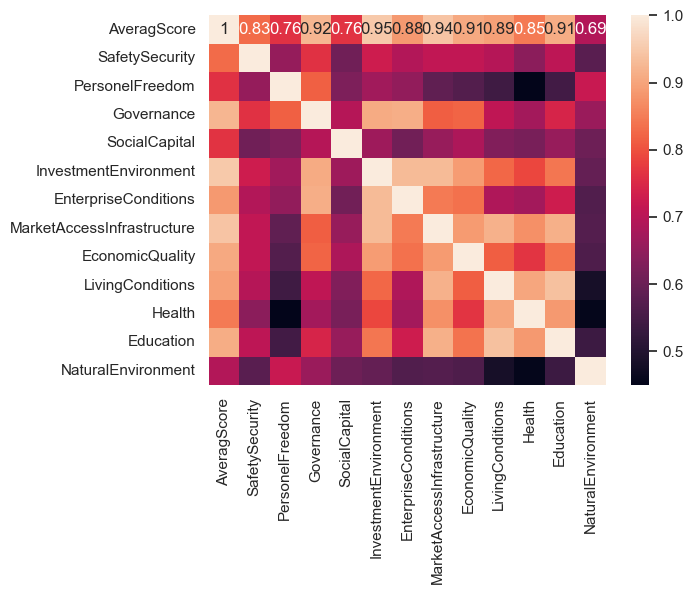

In [155]:
sns.heatmap(data1.drop(columns='Country',axis=1).corr(),annot=True)

BOXPLOT VISUALIZATIONS

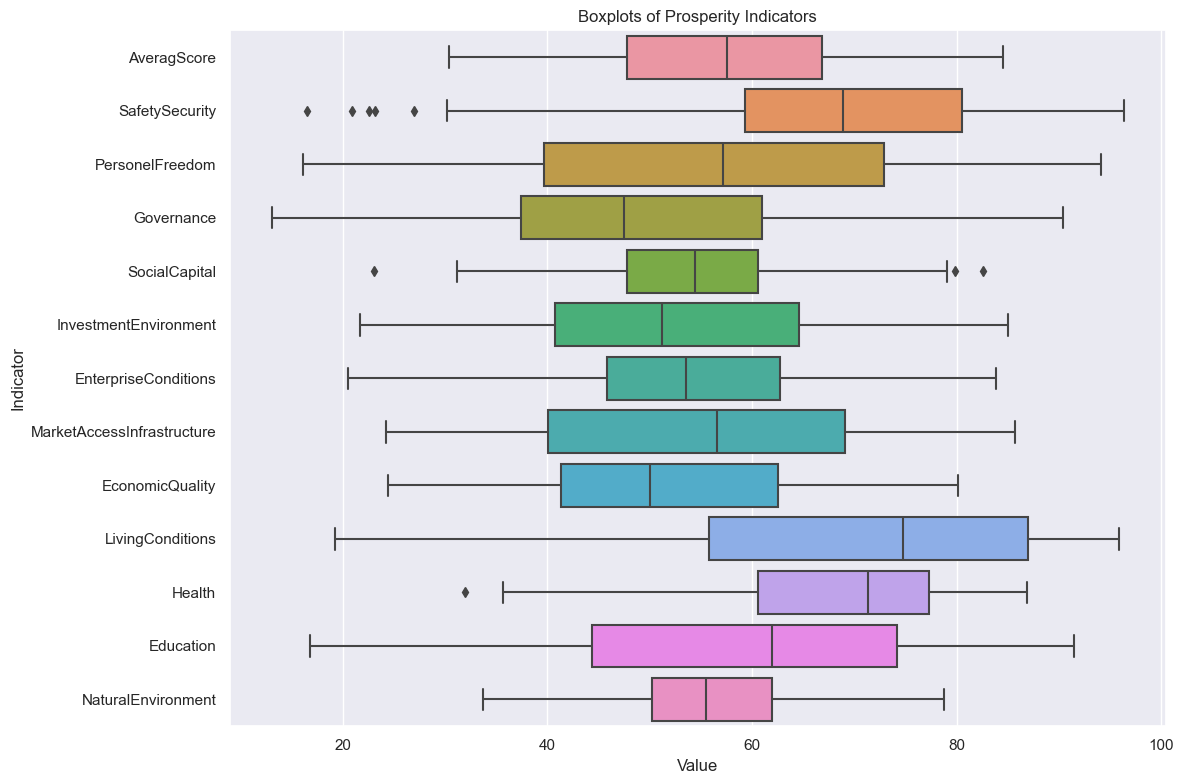

In [156]:
# Reshape the data from wide to long format
data_long = pd.melt(data, id_vars=['Country'], var_name='Indicator', value_name='Value')

# Create the plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Value', y='Indicator', data=data_long, orient='h')

# Set the title and labels
plt.title('Boxplots of Prosperity Indicators')
plt.xlabel('Value')
plt.ylabel('Indicator')

# Apply a minimal theme
sns.set_style("whitegrid")

# Remove the legend
plt.legend([],[], frameon=False)

# Show the plot
plt.tight_layout()
plt.show()

In [157]:
# Set 'Country' column as index (equivalent to row names in R)
data = data.set_index('Country')

# Display the first few rows
print(data.head())

               AveragScore  SafetySecurity  PersonelFreedom  Governance  \
Country                                                                   
 Denmark             84.55           92.59            94.09       89.45   
 Sweden              83.67           90.97            91.90       86.41   
 Norway              83.59           93.30            94.10       89.66   
 Finland             83.47           89.56            91.96       90.41   
  Switzerland        83.42           95.66            87.50       87.67   

               SocialCapital  InvestmentEnvironment  EnterpriseConditions  \
Country                                                                     
 Denmark               82.56                  82.42                 79.64   
 Sweden                78.29                  82.81                 75.54   
 Norway                79.03                  82.24                 75.95   
 Finland               77.27                  84.12                 77.25   
  Switzerlan

PCA WITH RAW DATA

In [158]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [159]:
# Select columns 2 to 13 (Python uses 0-based indexing)
data = data.iloc[:, 1:13]

# Standardize the data (PCA is sensitive to the scale of features)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Perform PCA
pca = PCA()
pca_data = pca.fit_transform(data_scaled)

# Print summary
print("Standard deviations:")
print(pca.singular_values_)
print("\nProportion of Variance:")
print(pca.explained_variance_ratio_)
print("\nCumulative Proportion:")
print(pca.explained_variance_ratio_.cumsum())

Standard deviations:
[38.62965925 13.37208506  9.49353179  8.01706788  7.70832435  6.73292397
  5.02463237  4.04605849  3.50443086  2.74304419  2.59539195  2.37208953]

Proportion of Variance:
[0.74463601 0.08922787 0.04497363 0.03207254 0.02964983 0.02262089
 0.01259827 0.00816896 0.00612826 0.00375464 0.00336131 0.00280779]

Cumulative Proportion:
[0.74463601 0.83386389 0.87883751 0.91091006 0.94055989 0.96318078
 0.97577905 0.98394801 0.99007627 0.9938309  0.99719221 1.        ]


Eigenvalues and Variance

In [160]:
# Calculate eigenvalues
eigenvalues = pca.explained_variance_

# Create a DataFrame similar to the output of get_eigenvalue in R
eig_val = pd.DataFrame({
    'eigenvalue': eigenvalues,
    'variance.percent': pca.explained_variance_ratio_ * 100,
    'cumulative.variance.percent': np.cumsum(pca.explained_variance_ratio_) * 100
})

# Print the result
print(eig_val)

    eigenvalue  variance.percent  cumulative.variance.percent
0     8.989461         74.463601                    74.463601
1     1.077185          8.922787                    83.386389
2     0.542935          4.497363                    87.883751
3     0.387189          3.207254                    91.091006
4     0.357941          2.964983                    94.055989
5     0.273086          2.262089                    96.318078
6     0.152090          1.259827                    97.577905
7     0.098618          0.816896                    98.394801
8     0.073982          0.612826                    99.007627
9     0.045327          0.375464                    99.383090
10    0.040579          0.336131                    99.719221
11    0.033896          0.280779                   100.000000


The eigenvalues provide insight into the amount of variance explained by each principal component. The first principal component (Dim.1) has a significantly higher eigenvalue compared to the others, indicating it explains a large portion of the variance. The second principal component (Dim.2) also explains a notable amount of variance, further justifying the selection of the first two components for analysis. The subsequent components contribute progressively less to the explained variance, making them less significant for capturing the dataset's overall structure.

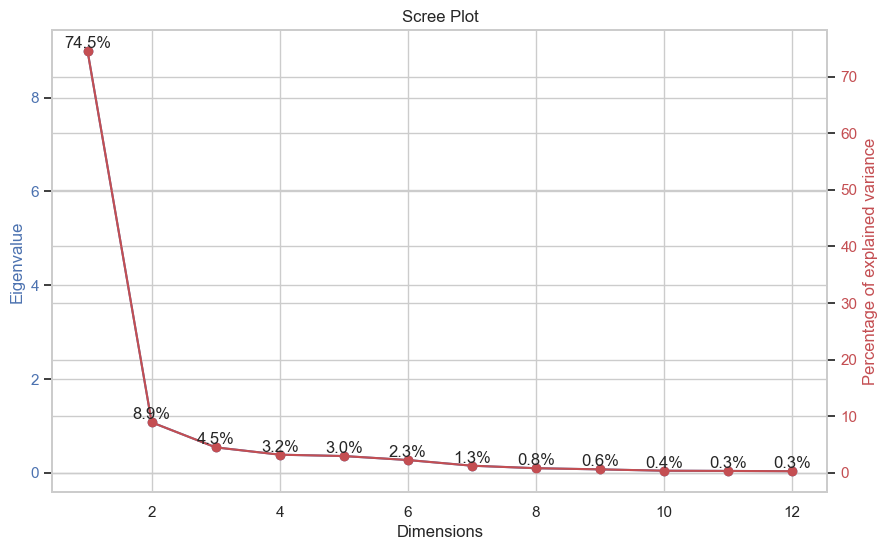

In [161]:
def fviz_eig(pca, addlabels=True):
    # Get eigenvalues and variance ratios
    eigenvalues = pca.explained_variance_
    variance_ratio = pca.explained_variance_ratio_

    # Create x-axis (PC numbers)
    n_components = len(eigenvalues)
    x = range(1, n_components + 1)

    # Create the plot
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot eigenvalues
    ax1.plot(x, eigenvalues, 'bo-')
    ax1.set_xlabel('Dimensions')
    ax1.set_ylabel('Eigenvalue', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    # Plot percentage of explained variance
    ax2 = ax1.twinx()
    ax2.plot(x, variance_ratio * 100, 'ro-')
    ax2.set_ylabel('Percentage of explained variance', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    # Add labels if requested
    if addlabels:
        for i, v in enumerate(variance_ratio):
            ax2.text(i + 1, v * 100, f'{v*100:.1f}%', ha='center', va='bottom')

    plt.title('Scree Plot')
    plt.show()

# Assuming you have already performed PCA
fviz_eig(pca, addlabels=True)


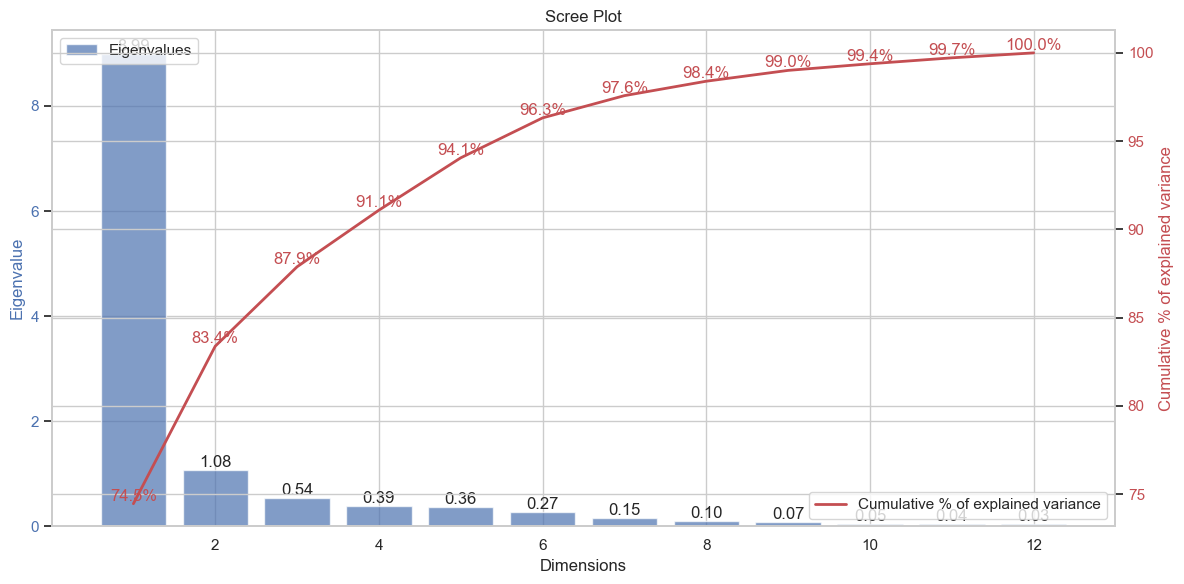

In [162]:
def fviz_eig(pca, addlabels=True):
    # Get eigenvalues and variance ratios
    eigenvalues = pca.explained_variance_
    variance_ratio = pca.explained_variance_ratio_

    # Create x-axis (PC numbers)
    n_components = len(eigenvalues)
    x = range(1, n_components + 1)

    # Create the plot
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plot eigenvalues as bars
    bars = ax1.bar(x, eigenvalues, color='b', alpha=0.7, label='Eigenvalues')
    ax1.set_xlabel('Dimensions')
    ax1.set_ylabel('Eigenvalue', color='b')
    ax1.tick_params(axis='y', labelcolor='b')

    # Plot percentage of explained variance as a line
    ax2 = ax1.twinx()
    ax2.plot(x, np.cumsum(variance_ratio) * 100, 'r-', linewidth=2, label='Cumulative % of explained variance')
    ax2.set_ylabel('Cumulative % of explained variance', color='r')
    ax2.tick_params(axis='y', labelcolor='r')

    # Add labels if requested
    if addlabels:
        for i, v in enumerate(variance_ratio):
            ax1.text(i + 1, eigenvalues[i], f'{eigenvalues[i]:.2f}', ha='center', va='bottom')
            ax2.text(i + 1, np.sum(variance_ratio[:i+1]) * 100, f'{np.sum(variance_ratio[:i+1])*100:.1f}%', 
                     ha='center', va='bottom', color='r')

    plt.title('Scree Plot')
    ax1.legend(loc='upper left')
    ax2.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

# Assuming you have already performed PCA
fviz_eig(pca, addlabels=True)

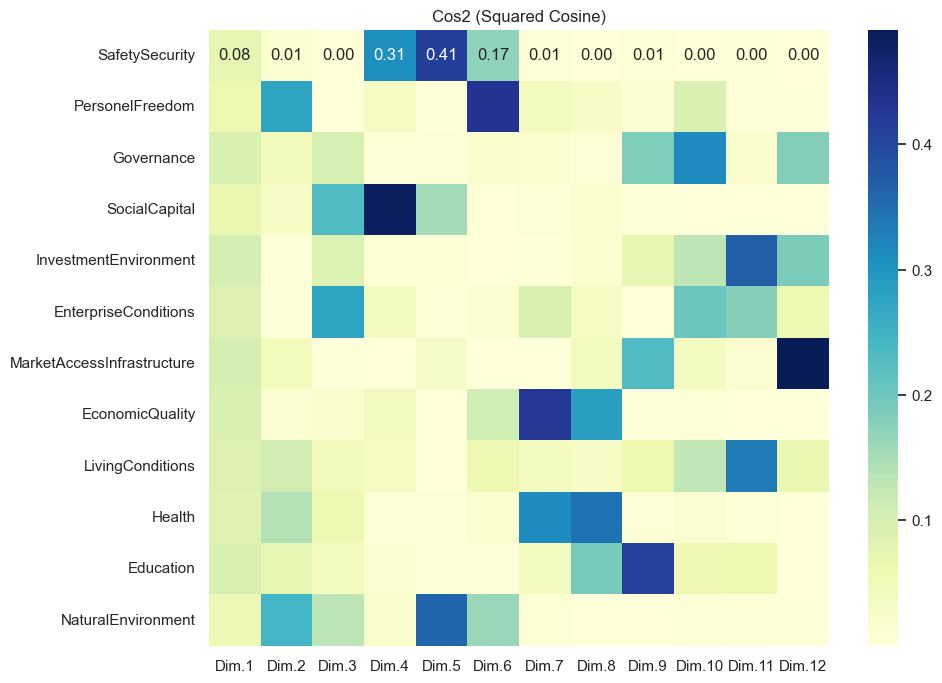

In [163]:
def get_pca_var(pca, data):
    # Calculate cos2 (squared cosine)
    cos2 = pd.DataFrame(pca.components_.T ** 2, 
                        columns=[f'Dim.{i+1}' for i in range(pca.n_components_)],
                        index=data.columns)
    return {'cos2': cos2}

# Assuming you've already performed PCA and have your data
# If not, you would need to do that first, like this:
# from sklearn.decomposition import PCA
# pca = PCA()
# pca_data = pca.fit_transform(data_scaled)

# Get PCA variables
res_var = get_pca_var(pca, data)

# Create correlation plot
plt.figure(figsize=(10, 8))
sns.heatmap(res_var['cos2'], annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Cos2 (Squared Cosine)')
plt.show()

Heatmap of Variable Contributions¶
The heatmap visualizes the contribution of each variable to the different principal components. This plot helps to identify which variables are most influential in defining the principal components. The intensity and size of the circles represent the magnitude of each variable's contribution to the respective principal components.

Interpretation and Dimension Selection
Significance of PC1 and PC2: The Scree Plot and explained variance summary both indicate that the first two principal components capture the majority of the dataset's variability. This makes them crucial for understanding the data's structure.
Contribution of Subsequent Components: The subsequent components (from PC3 onwards) each explain a much smaller proportion of the variance, with diminishing returns. For instance, PC3 explains only 3.8% and PC4 explains 3.3% of the variance.
Dimension Selection: Given that PC1 and PC2 together explain 86.6% of the variance, selecting these two dimensions is sufficient for capturing the most important aspects of the data. This reduces complexity while retaining the majority of the information.
Conclusion
Choosing two dimensions (PC1 and PC2) for PCA is sufficient for this dataset, as it captures most of the variance and simplifies further analysis and visualization. This approach helps in reducing the dimensionality of the data while retaining the critical information needed for meaningful insights. However, it should be noted that the representation of certain variables, such as Social Capital, Health, and Natural Environment, is quite low in the first two principal components. This indicates that the model may not be fully adequate for analyses focused on these specific aspects.

In [164]:
# PCA with Scale Data .... 

# Standardize the data (this is equivalent to center=TRUE, scale.=TRUE in R's prcomp)
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)

# # Perform PCA
# pca = PCA()
# scaled_pca_data = pca.fit_transform(data_scaled)


# Print summary
print("Standard deviations:")
print(np.sqrt(pca.explained_variance_))

print("\nProportion of Variance:")
print(pca.explained_variance_ratio_)

print("\nCumulative Proportion:")
print(np.cumsum(pca.explained_variance_ratio_))

print("\nRotation (first few components):")
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i}' for i in range(1, pca.n_components_ + 1)],
    index=data.columns
)
print(loadings.head())


Standard deviations:
[2.99824303 1.03787508 0.73684097 0.62224515 0.598282   0.52257625
 0.38998711 0.31403504 0.27199659 0.21290152 0.20144148 0.18410985]

Proportion of Variance:
[0.74463601 0.08922787 0.04497363 0.03207254 0.02964983 0.02262089
 0.01259827 0.00816896 0.00612826 0.00375464 0.00336131 0.00280779]

Cumulative Proportion:
[0.74463601 0.83386389 0.87883751 0.91091006 0.94055989 0.96318078
 0.97577905 0.98394801 0.99007627 0.9938309  0.99719221 1.        ]

Rotation (first few components):
                            PC1       PC2       PC3       PC4       PC5  \
SafetySecurity        -0.274123 -0.116032  0.020562  0.554238  0.643093   
PersonelFreedom       -0.249878 -0.525105  0.009772  0.189332  0.056514   
Governance            -0.308145 -0.216966 -0.313304 -0.065911  0.077886   
SocialCapital         -0.258553 -0.174774  0.480811 -0.695937  0.393976   
InvestmentEnvironment -0.318330  0.049310 -0.302241 -0.101480 -0.100201   

                            PC6       PC

In [165]:
summary_df = pd.DataFrame({
    'Standard deviation': np.sqrt(pca.explained_variance_),
    'Proportion of Variance': pca.explained_variance_ratio_,
    'Cumulative Proportion': np.cumsum(pca.explained_variance_ratio_)
})

print(summary_df)
print("\nRotation:")
print(loadings)

    Standard deviation  Proportion of Variance  Cumulative Proportion
0             2.998243                0.744636               0.744636
1             1.037875                0.089228               0.833864
2             0.736841                0.044974               0.878838
3             0.622245                0.032073               0.910910
4             0.598282                0.029650               0.940560
5             0.522576                0.022621               0.963181
6             0.389987                0.012598               0.975779
7             0.314035                0.008169               0.983948
8             0.271997                0.006128               0.990076
9             0.212902                0.003755               0.993831
10            0.201441                0.003361               0.997192
11            0.184110                0.002808               1.000000

Rotation:
                                 PC1       PC2       PC3       PC4       PC5  \

In [166]:
# Perform PCA
pca = PCA()
scaled_pca_data = pca.fit_transform(data_scaled)

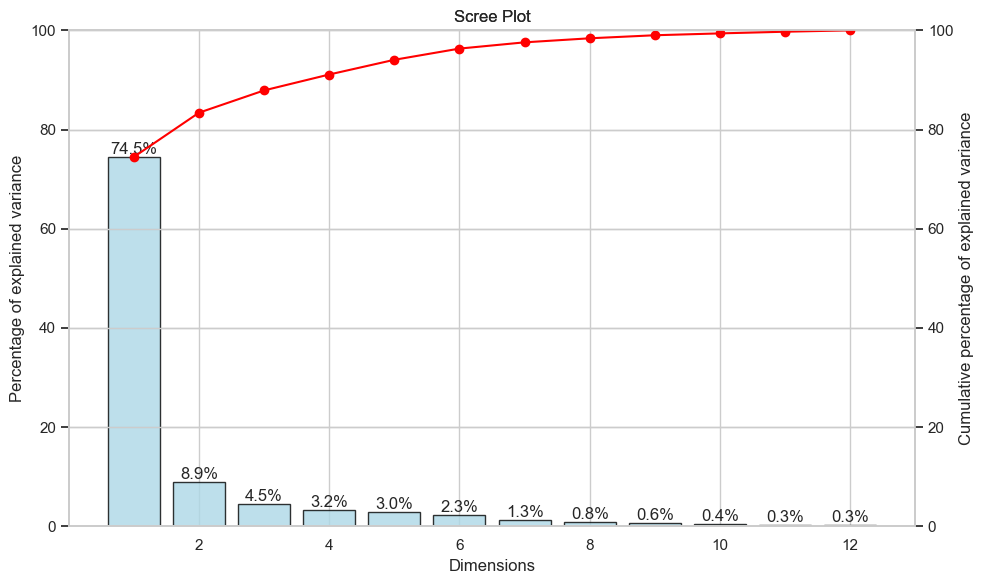

In [167]:
def fviz_eig(pca, addlabels=True):
    # Get variance explained by each principal component
    var_explained = pca.explained_variance_ratio_

    # Create x-axis (PC numbers)
    n_components = len(var_explained)
    x = range(1, n_components + 1)

    # Create the plot
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Plot variance explained
    ax1.bar(x, var_explained * 100, alpha=0.8, color='lightblue', edgecolor='black')
    ax1.set_xlabel('Dimensions')
    ax1.set_ylabel('Percentage of explained variance')
    ax1.set_title('Scree Plot')

    # Add cumulative variance line
    ax2 = ax1.twinx()
    cumulative_var = np.cumsum(var_explained) * 100
    ax2.plot(x, cumulative_var, color='red', marker='o')
    ax2.set_ylabel('Cumulative percentage of explained variance')

    # Set y-axis range to 0-100 for both axes
    ax1.set_ylim(0, 100)
    ax2.set_ylim(0, 100)

    # Add labels if requested
    if addlabels:
        for i, v in enumerate(var_explained):
            ax1.text(i + 1, v * 100, f'{v*100:.1f}%', ha='center', va='bottom')

    plt.title('Scree Plot')
    plt.tight_layout()
    plt.show()

# Assuming you have already performed PCA
fviz_eig(pca, addlabels=True)

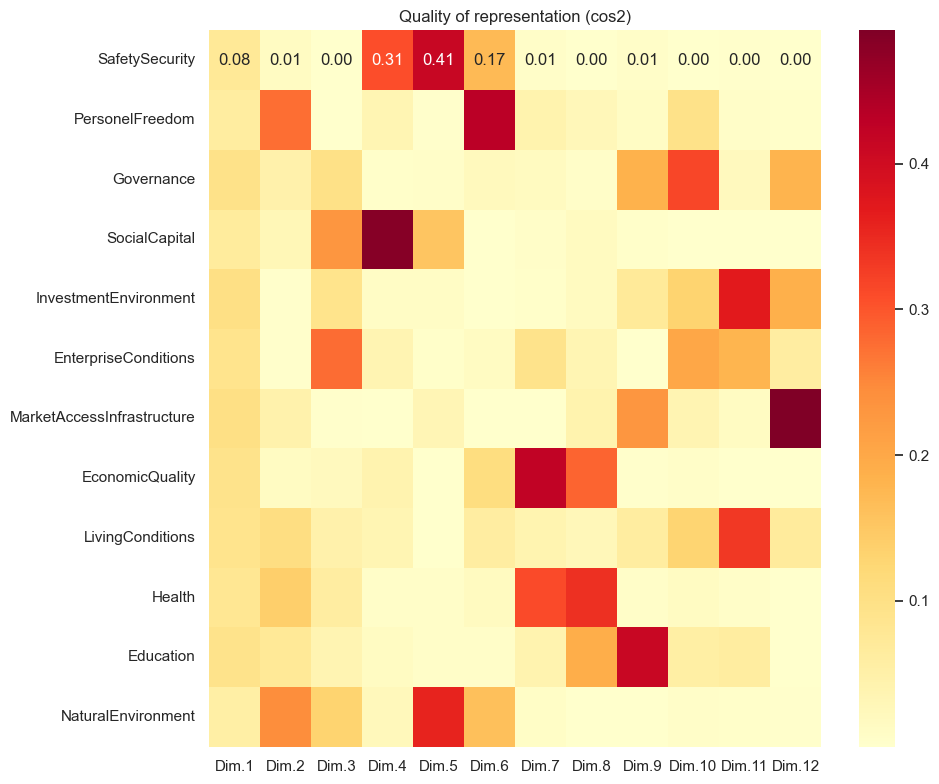

In [168]:
def get_pca_var(pca, data):
    # Calculate cos2 (squared cosine)
    cos2 = pd.DataFrame(pca.components_.T ** 2, 
                        columns=[f'Dim.{i+1}' for i in range(pca.n_components_)],
                        index=data.columns)
    return {'cos2': cos2}

# Assuming you've already performed PCA and have your data
# If not, you would need to do that first, like this:
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
# pca = PCA()
# scaled_pca_data = pca.fit_transform(data_scaled)

# Get PCA variables
res_var = get_pca_var(pca, data)

# Create correlation plot
plt.figure(figsize=(10, 8))
sns.heatmap(res_var['cos2'], annot=True, cmap='YlOrRd', fmt='.2f', cbar=True)
plt.title('Quality of representation (cos2)')
plt.tight_layout()
plt.show()

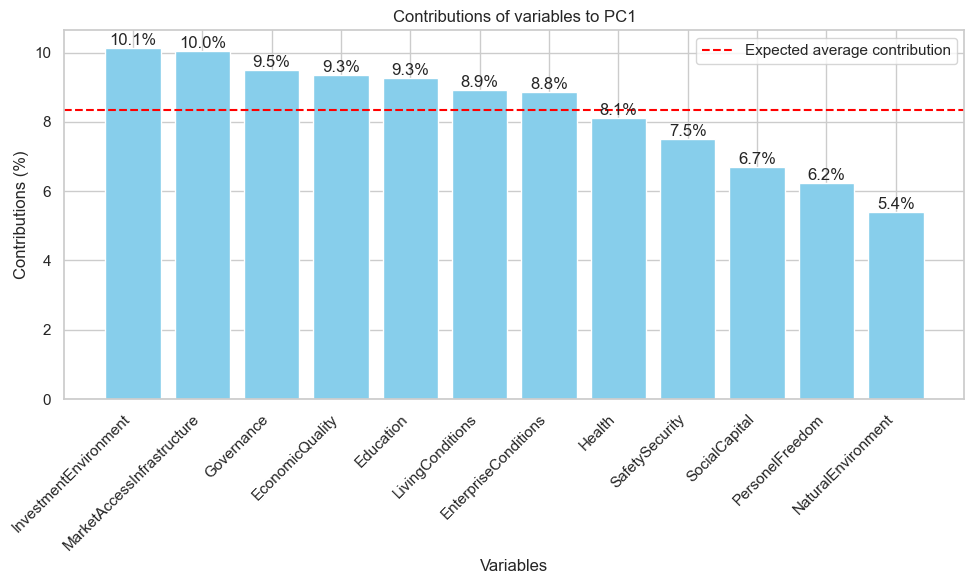

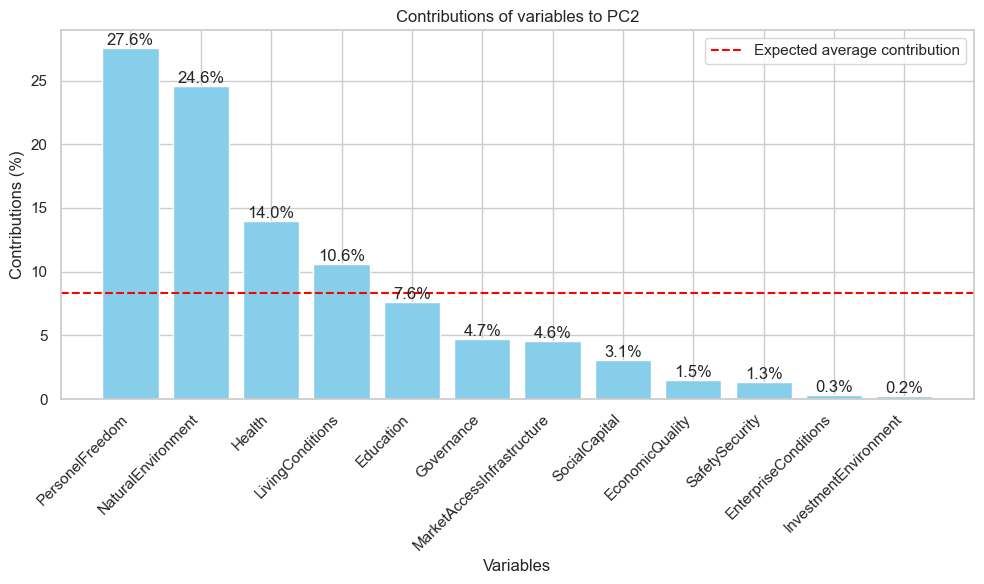

In [169]:
def fviz_contrib(pca, data, choice="var", axes=1, top=None):
    # Get the loadings
    loadings = pca.components_.T
    
    # Calculate contributions
    contrib = loadings ** 2
    contrib = contrib / contrib.sum(axis=0)
    
    # Convert to DataFrame
    contrib_df = pd.DataFrame(contrib, index=data.columns, 
                              columns=[f'PC{i+1}' for i in range(pca.n_components_)])
    
    # Select the specified axis (PC)
    if isinstance(axes, int):
        axes = [axes]
    selected_contrib = contrib_df[[f'PC{ax}' for ax in axes]]
    
    # Sum contributions if multiple axes are specified
    if len(axes) > 1:
        selected_contrib = selected_contrib.sum(axis=1)
        selected_contrib = selected_contrib.sort_values(ascending=False)
    else:
        selected_contrib = selected_contrib.iloc[:, 0].sort_values(ascending=False)
    
    # Select top contributors if specified
    if top is not None:
        selected_contrib = selected_contrib.head(top)
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    bars = plt.bar(selected_contrib.index, selected_contrib.values * 100, color='skyblue')
    plt.axhline(y=100/len(data.columns), color='red', linestyle='--', 
                label='Expected average contribution')
    
    # Annotate bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.1f}%', ha='center', va='bottom')
    
    plt.title(f'Contributions of variables to PC{axes[0]}')
    plt.xlabel('Variables')
    plt.ylabel('Contributions (%)')
    plt.xticks(rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Assuming you've already performed PCA
# Use the function for PC1
fviz_contrib(pca, data, choice="var", axes=1, top=13)

# Use the function for PC2
fviz_contrib(pca, data, choice="var", axes=2, top=13)

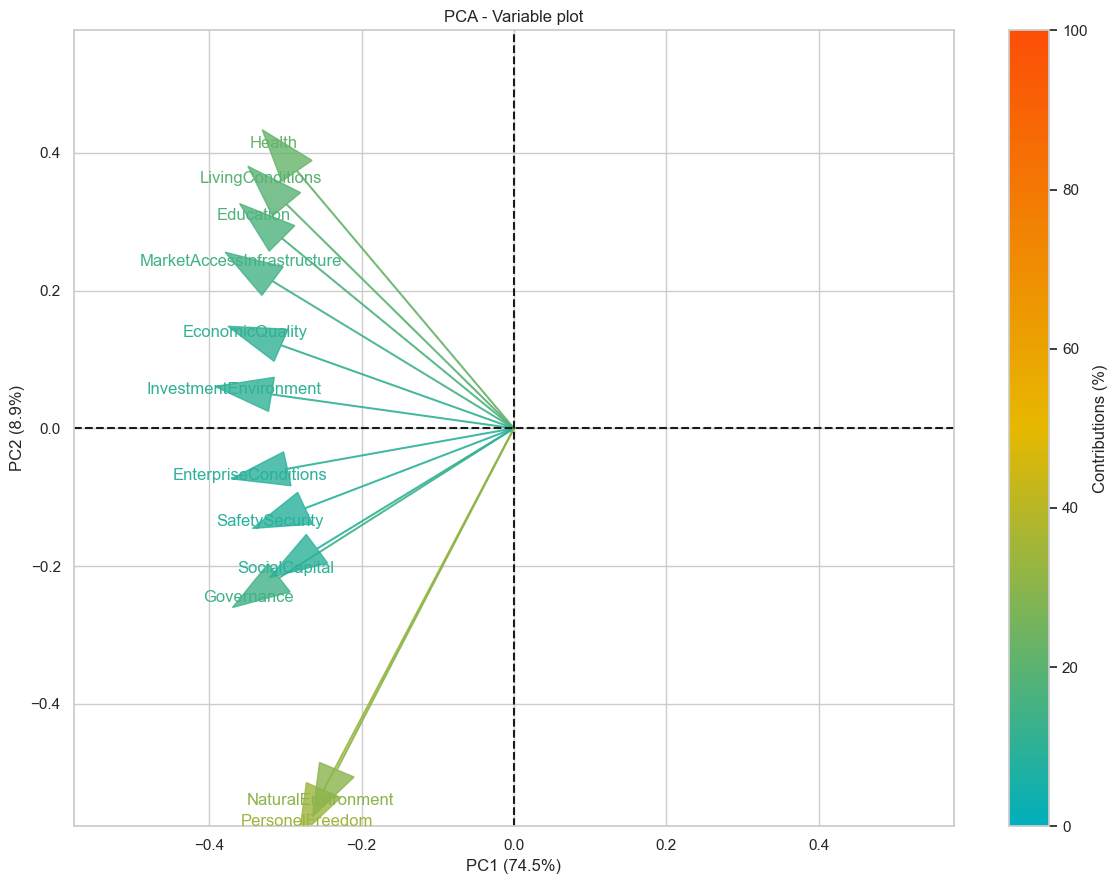

In [170]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def fviz_pca_var(pca, data, col_var="contrib", gradient_cols=None, repel=True):
    # Get loadings and calculate contributions
    loadings = pca.components_.T[:, :2]  # We'll use only the first two PCs
    contrib = loadings ** 2
    contrib = contrib / contrib.sum(axis=0) * 100  # Contributions in percentage

    # Create a DataFrame with the results
    res = pd.DataFrame({
        'PC1': loadings[:, 0],
        'PC2': loadings[:, 1],
        'contrib': np.sum(contrib, axis=1)
    }, index=data.columns)

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 9))

    # Define color gradient
    if gradient_cols is None:
        gradient_cols = ["#00AFBB", "#E7B800", "#FC4E07"]
    cmap = plt.cm.colors.LinearSegmentedColormap.from_list("", gradient_cols)

    # Plot arrows
    for idx, row in res.iterrows():
        ax.arrow(0, 0, row['PC1'], row['PC2'], color=cmap(row['contrib']/100), alpha=0.8, head_width=0.05)

    # Add variable names with simple repulsion
    for idx, row in res.iterrows():
        x, y = row['PC1'], row['PC2']
        if repel:
            # Simple repulsion: move text slightly away from the center
            angle = np.arctan2(y, x)
            x += 0.05 * np.cos(angle)
            y += 0.05 * np.sin(angle)
        ax.text(x, y, idx, color=cmap(row['contrib']/100), ha='center', va='center')

    # Set plot limits
    max_val = np.abs(loadings).max() * 1.1
    ax.set_xlim(-max_val, max_val)
    ax.set_ylim(-max_val, max_val)

    # Add circle
    circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='g', linestyle='--')
    ax.add_artist(circle)

    # Add axes
    ax.axhline(y=0, color='k', linestyle='--')
    ax.axvline(x=0, color='k', linestyle='--')

    # Set labels and title
    ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.1%})")
    ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.1%})")
    ax.set_title("PCA - Variable plot")

    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=100))
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax)
    cbar.set_label('Contributions (%)')

    plt.tight_layout()
    plt.show()

# Assuming you've already performed PCA
# Use the function
fviz_pca_var(pca, data, col_var="contrib", 
             gradient_cols=["#00AFBB", "#E7B800", "#FC4E07"],
             repel=True)

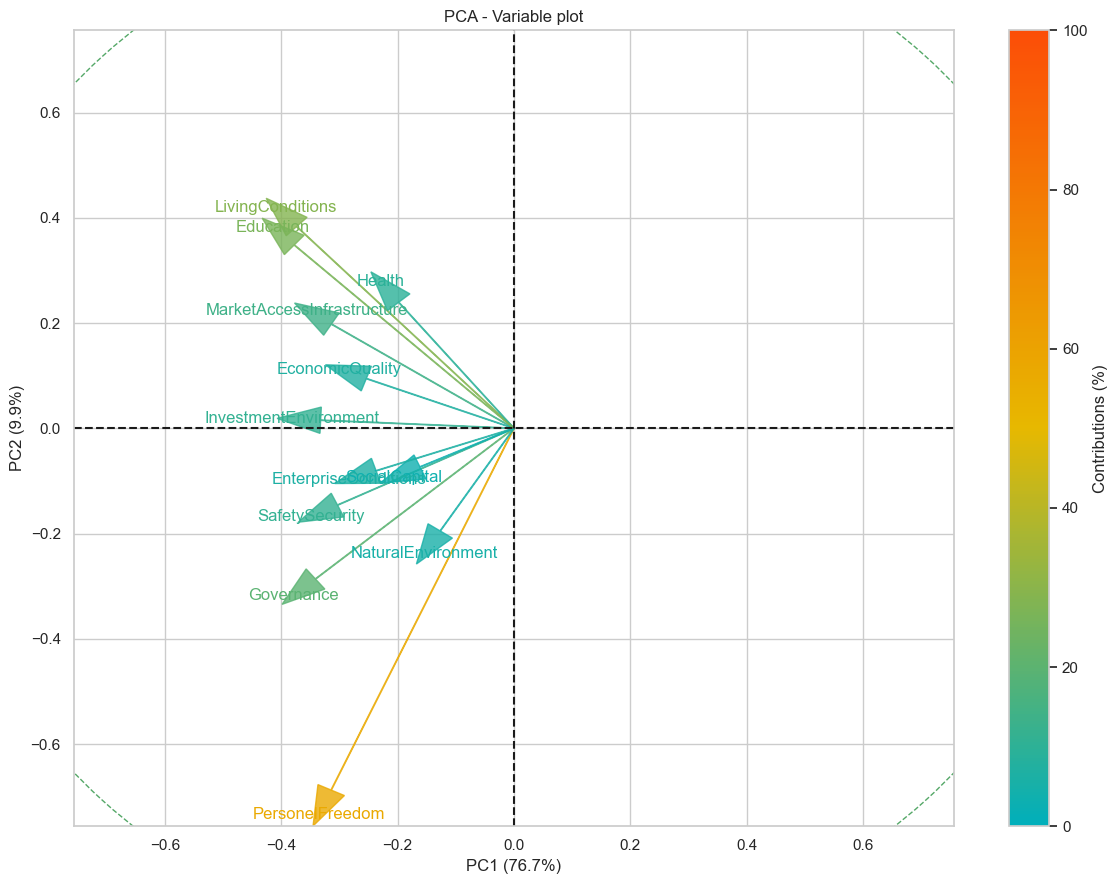

In [171]:
# Contribution Plots - Dim1 and Dim2
def fviz_pca_var(pca_obj, data, col_var="contrib", gradient_cols=None, repel=True):
    # Check if pca_obj is a PCA object or the transformed data
    if isinstance(pca_obj, PCA):
        loadings = pca_obj.components_.T[:, :2]
        var_ratio = pca_obj.explained_variance_ratio_[:2]
    else:
        # If it's the transformed data, we need to perform PCA again
        pca = PCA()
        pca.fit(data)
        loadings = pca.components_.T[:, :2]
        var_ratio = pca.explained_variance_ratio_[:2]

    # Calculate contributions
    contrib = loadings ** 2
    contrib = contrib / contrib.sum(axis=0) * 100  # Contributions in percentage

    # Create a DataFrame with the results
    res = pd.DataFrame({
        'PC1': loadings[:, 0],
        'PC2': loadings[:, 1],
        'contrib': np.sum(contrib, axis=1)
    }, index=data.columns)

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 9))

    # Define color gradient
    if gradient_cols is None:
        gradient_cols = ["#00AFBB", "#E7B800", "#FC4E07"]
    cmap = plt.cm.colors.LinearSegmentedColormap.from_list("", gradient_cols)

    # Plot arrows
    for idx, row in res.iterrows():
        ax.arrow(0, 0, row['PC1'], row['PC2'], color=cmap(row['contrib']/100), alpha=0.8, head_width=0.05)

    # Add variable names with simple repulsion
    texts = []
    for idx, row in res.iterrows():
        x, y = row['PC1'], row['PC2']
        if repel:
            # Simple repulsion: move text slightly away from the center
            angle = np.arctan2(y, x)
            x += 0.05 * np.cos(angle)
            y += 0.05 * np.sin(angle)
        texts.append(ax.text(x, y, idx, color=cmap(row['contrib']/100), ha='center', va='center'))

    # Set plot limits
    max_val = np.abs(loadings).max() * 1.1
    ax.set_xlim(-max_val, max_val)
    ax.set_ylim(-max_val, max_val)

    # Add circle
    circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='g', linestyle='--')
    ax.add_artist(circle)

    # Add axes
    ax.axhline(y=0, color='k', linestyle='--')
    ax.axvline(x=0, color='k', linestyle='--')

    # Set labels and title
    ax.set_xlabel(f"PC1 ({var_ratio[0]:.1%})")
    ax.set_ylabel(f"PC2 ({var_ratio[1]:.1%})")
    ax.set_title("PCA - Variable plot")

    # Add colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=100))
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax)
    cbar.set_label('Contributions (%)')

    plt.tight_layout()
    plt.show()

# Use the function
fviz_pca_var(scaled_pca_data, data, col_var="contrib", 
             gradient_cols=["#00AFBB", "#E7B800", "#FC4E07"],
             repel=True)

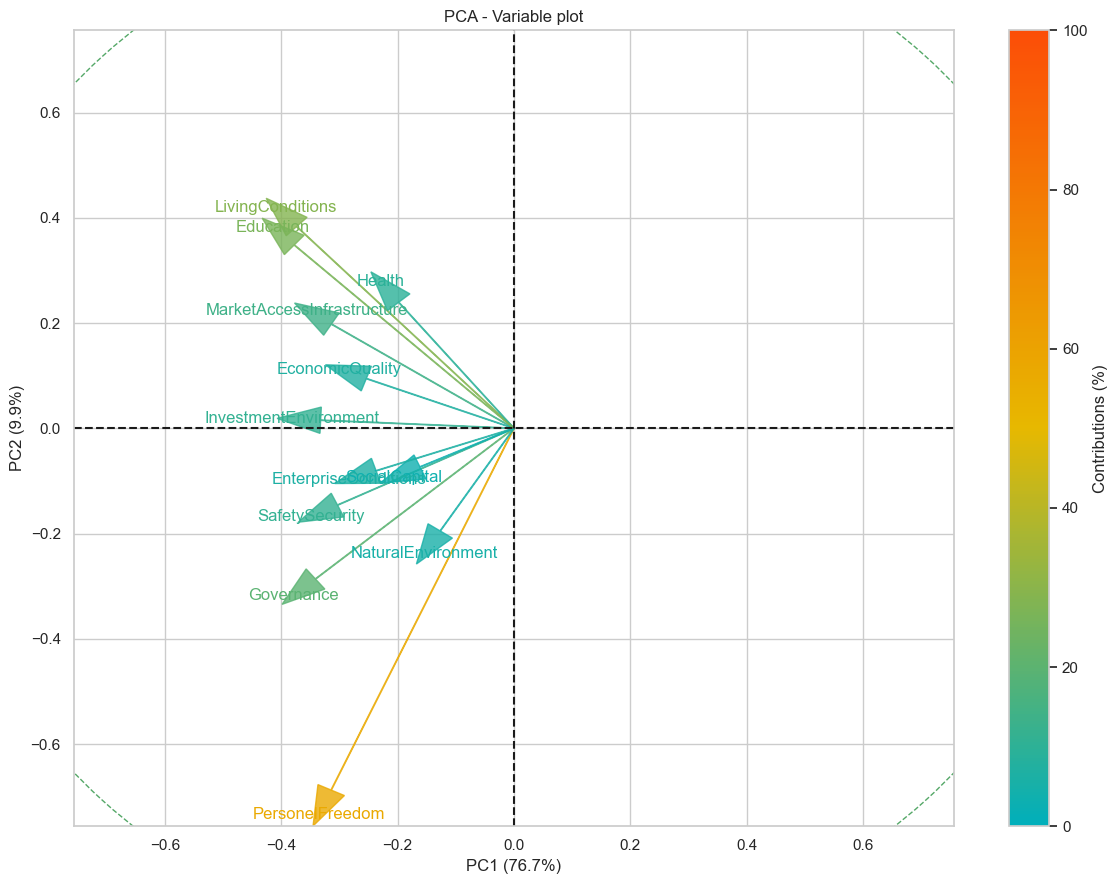

In [172]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Perform PCA
pca = PCA()
scaled_pca_data = pca.fit_transform(data_scaled)

# Create the PCA variable plot
fviz_pca_var(scaled_pca_data, data, col_var="contrib", 
             gradient_cols=["#00AFBB", "#E7B800", "#FC4E07"],
             repel=True)

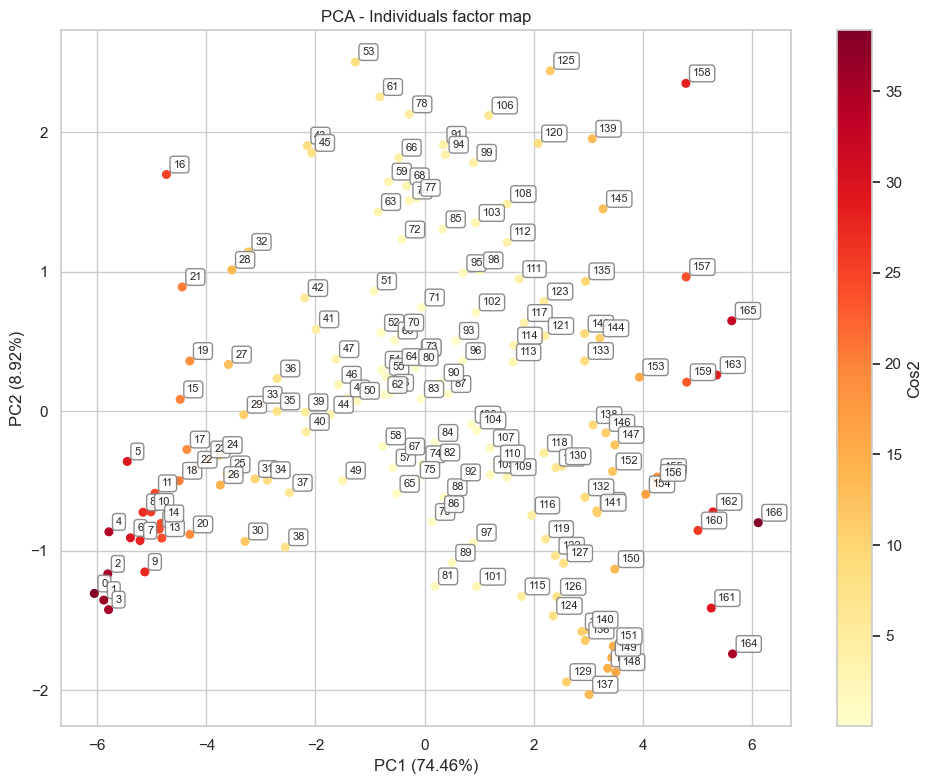

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

def fviz_pca_ind(pca_result, data, col_ind="cos2", n_components=2):
    # Extract the PCA coordinates
    coord = pca_result[:, :n_components]
    
    # Calculate the cos2 (quality of representation)
    cos2 = np.sum(coord**2, axis=1)
    
    # Create a DataFrame with the results
    df = pd.DataFrame({
        'PC1': coord[:, 0],
        'PC2': coord[:, 1],
        'cos2': cos2
    })
    
    # Create the plot
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(df['PC1'], df['PC2'], c=df['cos2'], cmap='YlOrRd', s=30)
    
    # Add a colorbar
    plt.colorbar(scatter, label='Cos2')
    
    # Set labels and title
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
    plt.title('PCA - Individuals factor map')
    
    # Add annotations (similar to repel in R)
    for i, row in df.iterrows():
        plt.annotate(i, (row['PC1'], row['PC2']), xytext=(5, 5), 
                     textcoords='offset points', fontsize=8, 
                     bbox=dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9))
    
    plt.tight_layout()
    plt.show()

# Assuming you've already performed PCA:
# pca = PCA()
# scaled_pca_data = pca.fit_transform(data)

# Use the function
fviz_pca_ind(scaled_pca_data, data)

DISTANCE MATRIX VISUALIZATION

In [174]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming 'data' is your original dataset as a numpy array or pandas DataFrame

# Calculate Euclidean and Manhattan distances for raw data
raw_dist_eucl = pdist(data, metric='euclidean')
raw_dist_manh = pdist(data, metric='cityblock')  # 'cityblock' is Manhattan distance in SciPy

# Perform PCA
pca = PCA()
pca_data = pca.fit_transform(data)

# Calculate Euclidean and Manhattan distances for first 2 PCs
pca_dist_eucl = pdist(pca_data[:, :2], metric='euclidean')
pca_dist_manh = pdist(pca_data[:, :2], metric='cityblock')

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Calculate Euclidean and Manhattan distances for scaled data
scaled_dist_eucl = pdist(scaled_data, metric='euclidean')
scaled_dist_manh = pdist(scaled_data, metric='cityblock')

# If you need these distances as square matrices, you can use:
# raw_dist_eucl_matrix = squareform(raw_dist_eucl)
# raw_dist_manh_matrix = squareform(raw_dist_manh)
# ... and so on for other distance variables

These six plots show the Euclidean and Manhattan distances for raw data, PCA-transformed data, and scaled data. Each plot represents the distances between data points using a color gradient; blue indicates larger distances, while red indicates smaller distances.

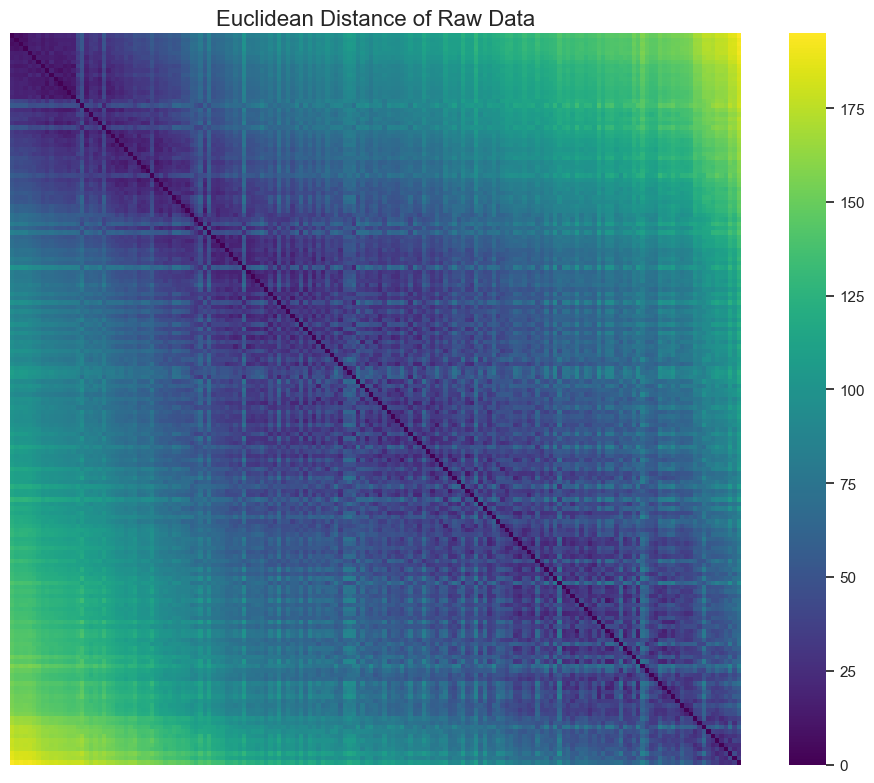

In [175]:
def fviz_dist(dist_matrix, title):
    # Convert the condensed distance matrix to a square matrix
    dist_square = squareform(dist_matrix)
    
    # Create the plot
    plt.figure(figsize=(10, 8))
    sns.heatmap(dist_square, cmap='viridis', square=True)
    
    # Customize the plot
    plt.title(title, fontsize=16)
    plt.axis('off')  # This removes all axis labels and ticks
    
    plt.tight_layout()
    plt.show()

# Using the function to plot
fviz_dist(raw_dist_eucl, "Euclidean Distance of Raw Data")

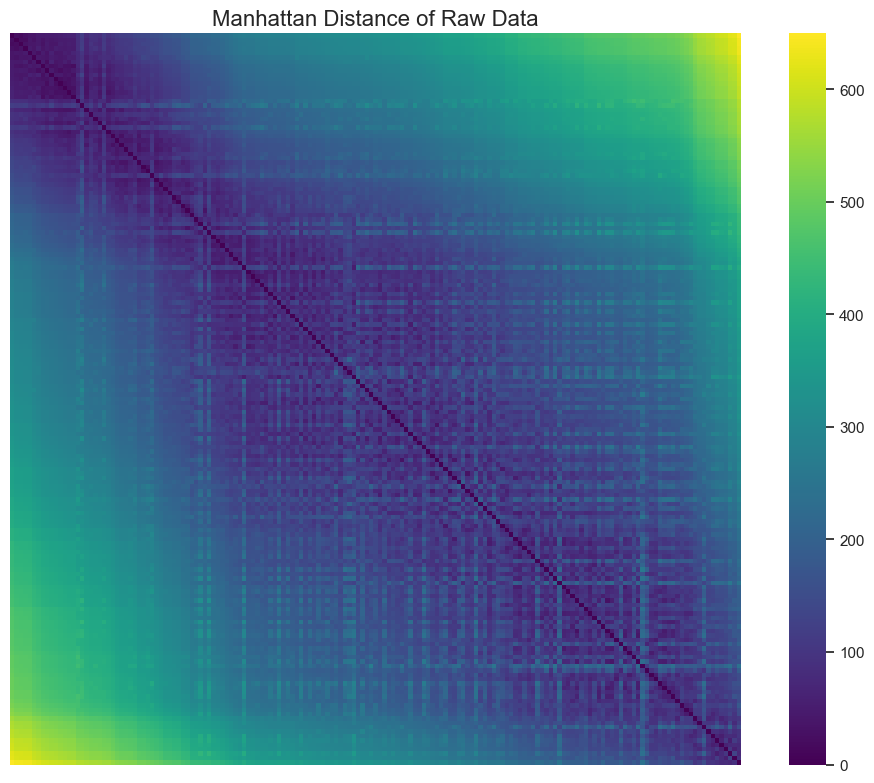

In [176]:
def fviz_dist(dist_matrix, title):
    # Convert the condensed distance matrix to a square matrix
    dist_square = squareform(dist_matrix)
    
    # Create the plot
    plt.figure(figsize=(10, 8))
    sns.heatmap(dist_square, cmap='viridis', square=True)
    
    # Customize the plot
    plt.title(title, fontsize=16)
    plt.axis('off')  # This removes all axis labels and ticks
    
    plt.tight_layout()
    plt.show()

# Using the function to plot Manhattan distance
fviz_dist(raw_dist_manh, "Manhattan Distance of Raw Data")

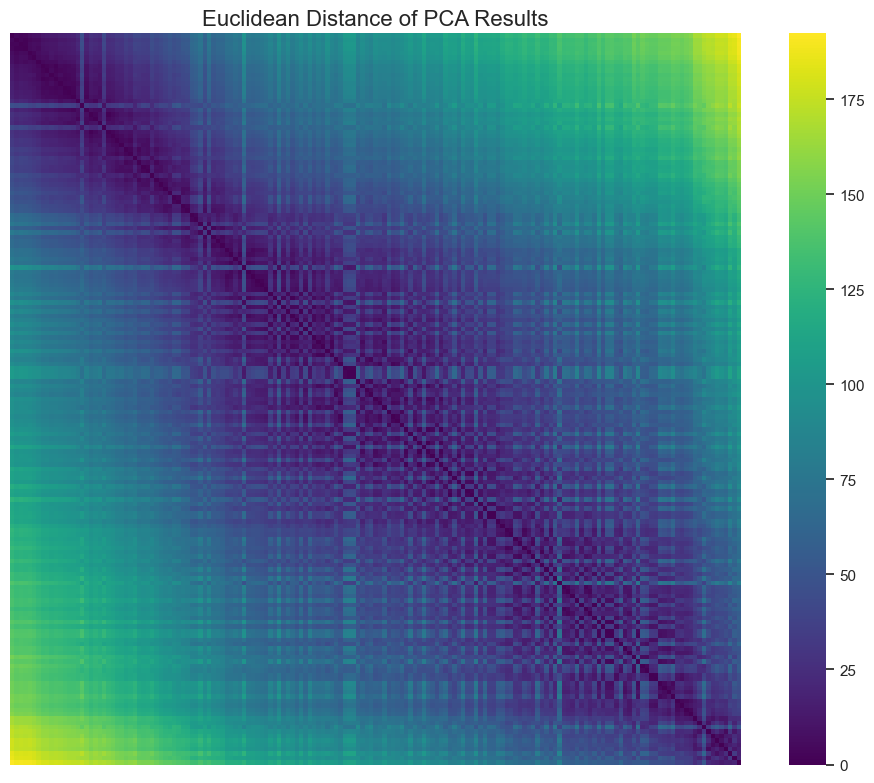

In [177]:
def fviz_dist(dist_matrix, title):
    # Convert the condensed distance matrix to a square matrix
    dist_square = squareform(dist_matrix)
    
    # Create the plot
    plt.figure(figsize=(10, 8))
    sns.heatmap(dist_square, cmap='viridis', square=True)
    
    # Customize the plot
    plt.title(title, fontsize=16)
    plt.axis('off')  # This removes all axis labels and ticks
    
    plt.tight_layout()
    plt.show()

# Using the function to plot Euclidean distance of PCA results
fviz_dist(pca_dist_eucl, "Euclidean Distance of PCA Results")

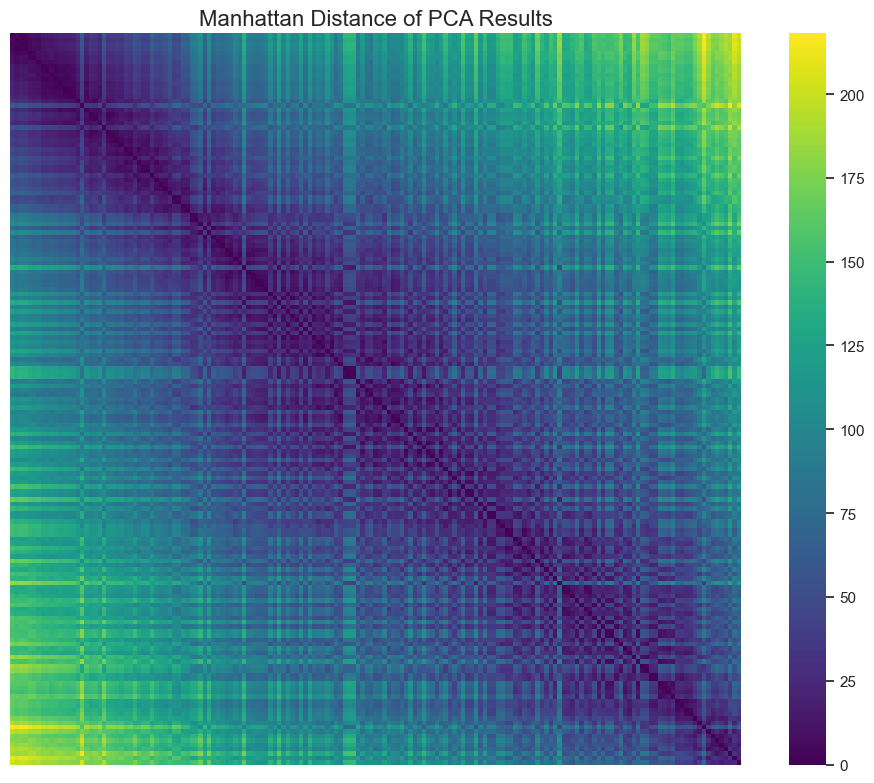

In [178]:
def fviz_dist(dist_matrix, title):
    # Convert the condensed distance matrix to a square matrix
    dist_square = squareform(dist_matrix)
    
    # Create the plot
    plt.figure(figsize=(10, 8))
    sns.heatmap(dist_square, cmap='viridis', square=True)
    
    # Customize the plot
    plt.title(title, fontsize=16)
    plt.axis('off')  # This removes all axis labels and ticks
    
    plt.tight_layout()
    plt.show()

# Using the function to plot Manhattan distance of PCA results
fviz_dist(pca_dist_manh, "Manhattan Distance of PCA Results")

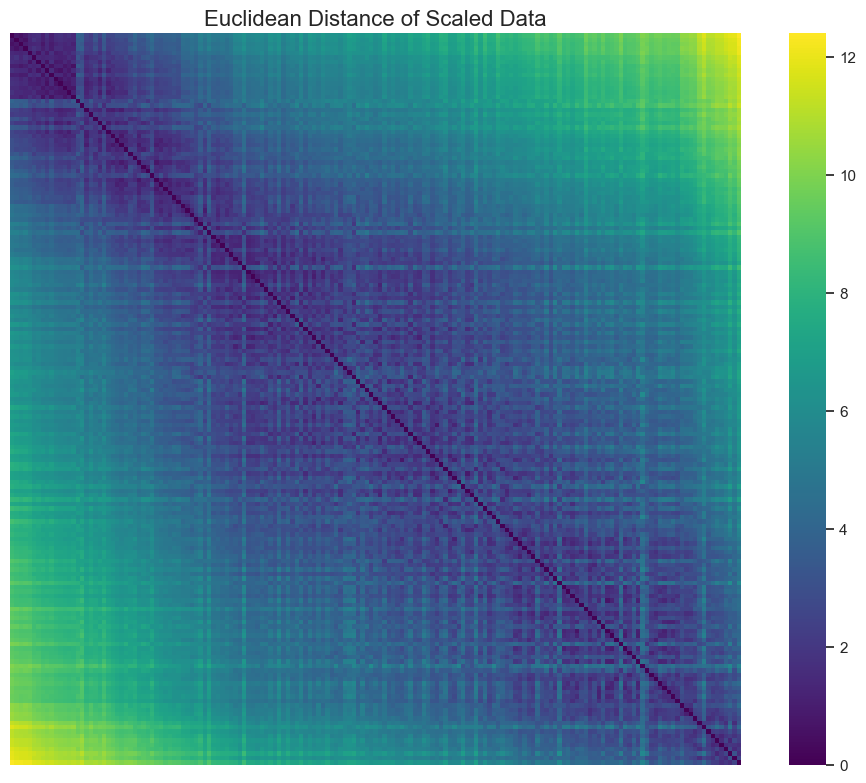

In [179]:
def fviz_dist(dist_matrix, title):
    # Convert the condensed distance matrix to a square matrix
    dist_square = squareform(dist_matrix)
    
    # Create the plot
    plt.figure(figsize=(10, 8))
    sns.heatmap(dist_square, cmap='viridis', square=True)
    
    # Customize the plot
    plt.title(title, fontsize=16)
    plt.axis('off')  # This removes all axis labels and ticks
    
    plt.tight_layout()
    plt.show()

# Using the function to plot Euclidean distance of scaled data
fviz_dist(scaled_dist_eucl, "Euclidean Distance of Scaled Data")

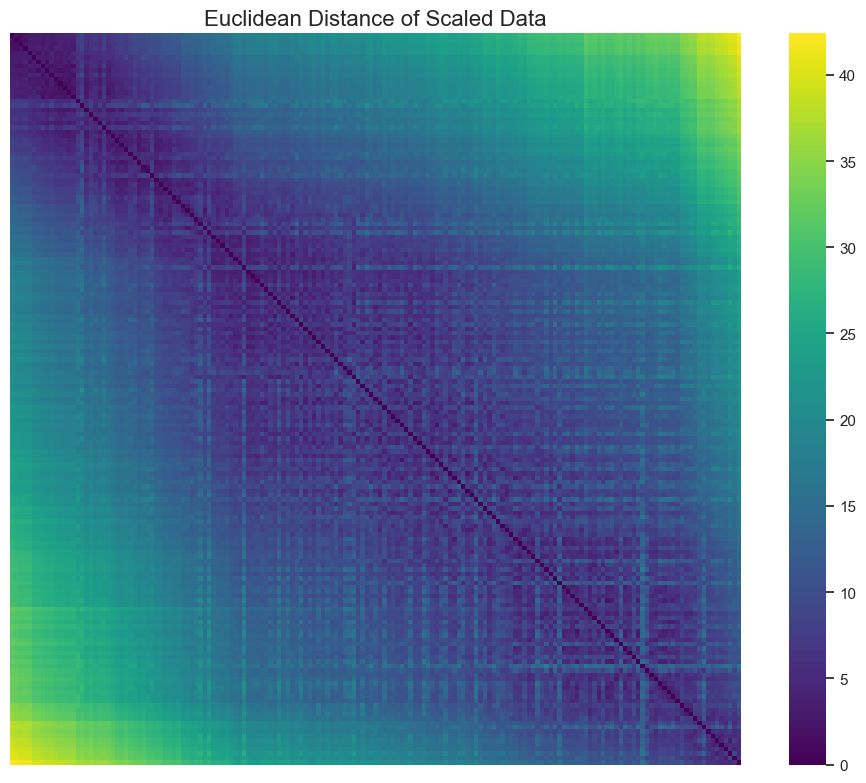

In [180]:
def fviz_dist(dist_matrix, title):
    # Convert the condensed distance matrix to a square matrix
    dist_square = squareform(dist_matrix)
    
    # Create the plot
    plt.figure(figsize=(10, 8))
    sns.heatmap(dist_square, cmap='viridis', square=True)
    
    # Customize the plot
    plt.title(title, fontsize=16)
    plt.axis('off')  # This removes all axis labels and ticks
    
    plt.tight_layout()
    plt.show()

# Using the function to plot Euclidean distance of scaled data
fviz_dist(scaled_dist_manh, "Euclidean Distance of Scaled Data")

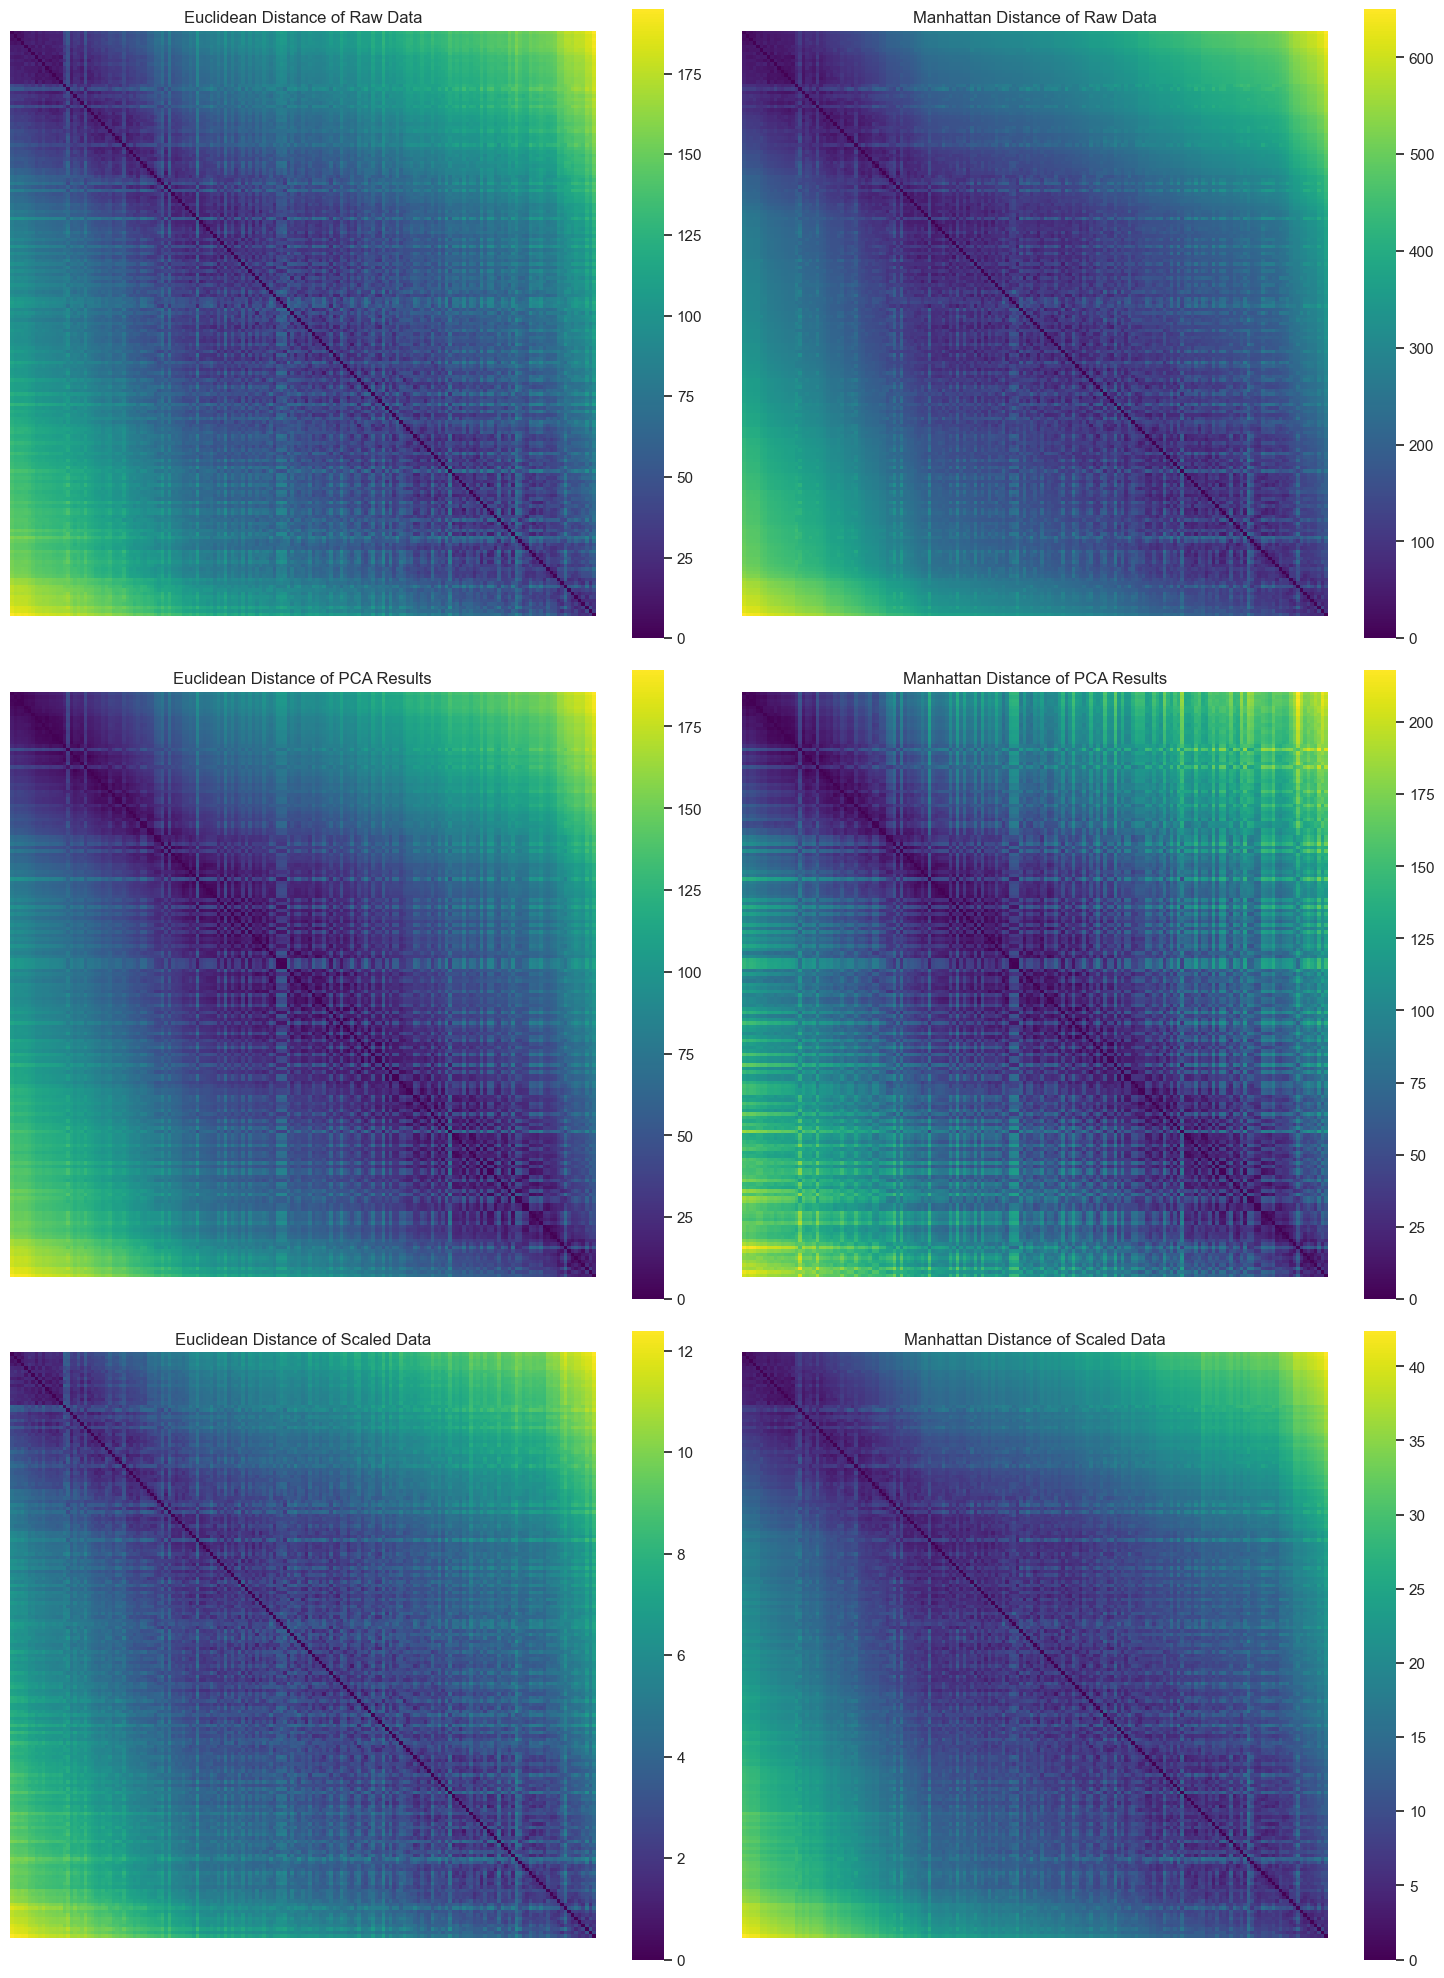

In [181]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import squareform

def fviz_dist(dist_matrix, title, ax):
    # Convert the condensed distance matrix to a square matrix
    dist_square = squareform(dist_matrix)
    
    # Create the plot on the given axis
    sns.heatmap(dist_square, cmap='viridis', square=True, ax=ax)
    
    # Customize the plot
    ax.set_title(title, fontsize=12)
    ax.axis('off')  # This removes all axis labels and ticks

# Create a 3x2 grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 20))

# Flatten the 2D array of axes for easier indexing
axs = axs.flatten()

# Create each plot in its respective subplot
fviz_dist(raw_dist_eucl, "Euclidean Distance of Raw Data", axs[0])
fviz_dist(raw_dist_manh, "Manhattan Distance of Raw Data", axs[1])
fviz_dist(pca_dist_eucl, "Euclidean Distance of PCA Results", axs[2])
fviz_dist(pca_dist_manh, "Manhattan Distance of PCA Results", axs[3])
fviz_dist(scaled_dist_eucl, "Euclidean Distance of Scaled Data", axs[4])
fviz_dist(scaled_dist_manh, "Manhattan Distance of Scaled Data", axs[5])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

This code creates a boxplot visualization of the scaled prosperity indicators from the 2023 Legatum Prosperity Index dataset. Let's break down what the code does and interpret the resulting visualization:

Data Preparation:

The code starts by scaling all numeric columns in the dataset (excluding the 'Country' column).
Scaling standardizes the data, giving each indicator a mean of 0 and a standard deviation of 1.
The 'Country' column is then added back to the scaled data.


Data Reshaping:

The scaled data is reshaped from wide to long format using pivot_longer().
This creates a dataframe where each row represents a country-indicator pair.


Visualization:

A boxplot is created using ggplot2, with indicators on the y-axis and scaled values on the x-axis.
The plot is flipped horizontally for better readability.
Each indicator is represented by a different color, though the legend is removed for simplicity.



Interpretation of the Boxplot:

Central Tendency:

The median (represented by the line in the middle of each box) for all indicators is around 0, which is expected after scaling.


Spread:

The boxes represent the interquartile range (IQR), from the 25th to 75th percentile.
Some indicators (e.g., SafetySecurity, PersonelFreedom) show larger boxes, indicating more variability among countries.
Others (e.g., AveragScore) have smaller boxes, suggesting more consistency across countries.


Outliers:

Outliers are represented by points beyond the whiskers.
Some indicators (e.g., SafetySecurity, Health) show more outliers, particularly on the lower end.
This suggests that while most countries cluster around the mean, some perform significantly worse in these areas.


Symmetry:

Most indicators show roughly symmetric distributions around the median.
However, some (e.g., LivingConditions, Health) show slight skewness, with longer tails on one side.


Comparison Across Indicators:

The scaling allows for direct comparison of variability across indicators.
For instance, NaturalEnvironment shows less variability compared to SafetySecurity or Health.


Overall Pattern:

The AveragScore shows the least variability, which is expected as it's an aggregate of other indicators.
Indicators related to governance and societal structures (e.g., Governance, SocialCapital) show moderate variability.
Health-related indicators show some of the largest spreads and most outliers, suggesting significant disparities in health outcomes across countries.



This visualization is particularly useful for understanding the relative variability of different prosperity indicators across countries, and for identifying which areas show the most significant disparities or outliers. It provides a standardized view that allows for direct comparison between different aspects of prosperity, which can be valuable for policy-makers and researchers in identifying areas that might require more focused attention or intervention.

In [182]:
data.head()

SafetySecurity  PersonelFreedom  Governance  SocialCapital  \
Country                                                                     
 Denmark                92.59            94.09       89.45          82.56   
 Sweden                 90.97            91.90       86.41          78.29   
 Norway                 93.30            94.10       89.66          79.03   
 Finland                89.56            91.96       90.41          77.27   
  Switzerland           95.66            87.50       87.67          69.14   

               InvestmentEnvironment  EnterpriseConditions  \
Country                                                      
 Denmark                       82.42                 79.64   
 Sweden                        82.81                 75.54   
 Norway                        82.24                 75.95   
 Finland                       84.12                 77.25   
  Switzerland                  80.81                 83.84   

               MarketAccessInfrastructure  EconomicQuality  LivingConditions  \
Country                                                                        
 Denmark                            78.79            76.81             95.77   
 Sweden                             79.67            76.18             95.33   
 Norway                             75.87            77.25             94.70   
 Finland                            78.77            70.28             94.46   
  Switzerland                       78.65            79.71             94.66   

               Health  Education  NaturalEnvironment  
Country                                               
 Denmark        81.07      87.48               73.94  
 Sweden         82.28      85.92               78.74  
 Norway         82.98      85.68               72.37  
 Finland        81.19      88.38               77.99  
  Switzerland   82.11      87.72               73.60

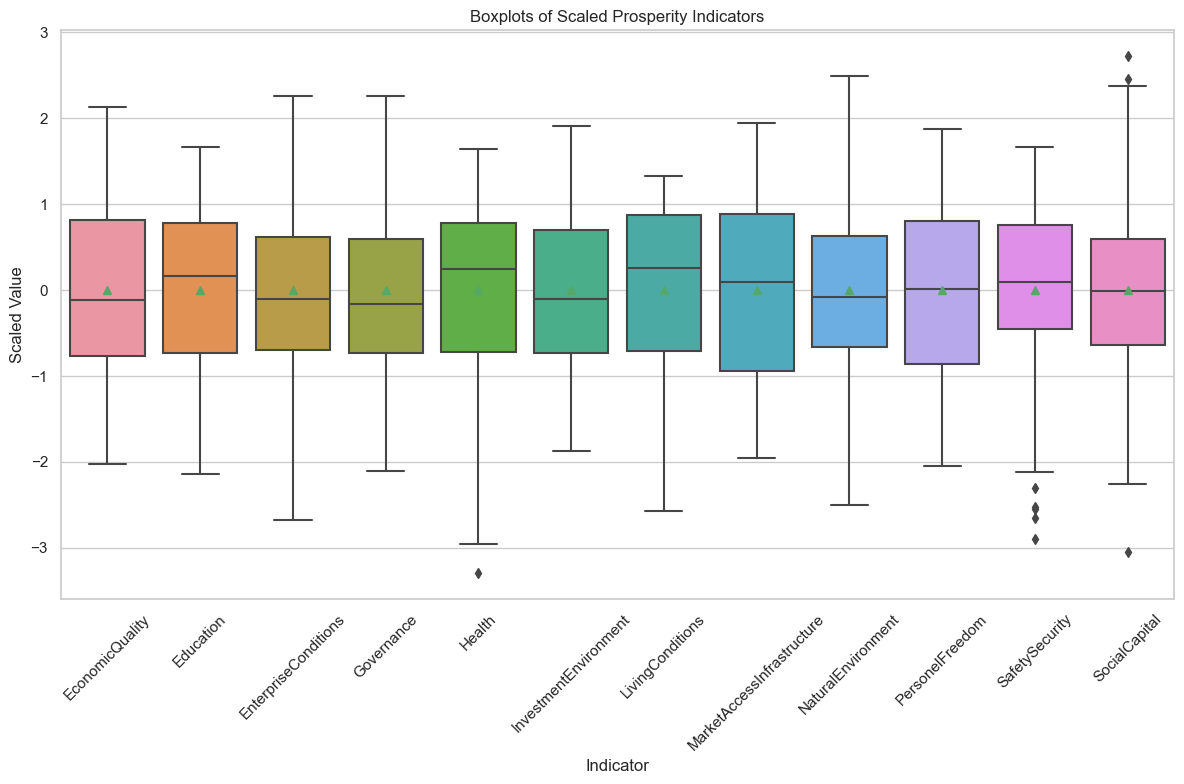

In [183]:
# Select features for scaling (exclude Country)
scaled_features = data.columns.difference(['Country'])

# Apply standard scaling (centering and scaling)
scaler = StandardScaler(with_mean=True, with_std=True)  # Equivalent to R's scale(center=TRUE, scale=TRUE)
scaled_data = pd.DataFrame(scaler.fit_transform(data[scaled_features]), columns=scaled_features)

df=pd.read_csv('data/2023 Global Country Development/data.csv')

# Add the Country column back to the scaled DataFrame
scaled_data['Country'] = df['Country']

# Reshape data for boxplot (similar to pivot_longer)
scaled_data_long = pd.melt(scaled_data, id_vars='Country', var_name='Indicator', value_name='Value')

# Create boxplot using seaborn (more customizable than geom_boxplot)
plt.figure(figsize=(12, 8))
sns.boxplot(
    x="Indicator",
    y="Value",
    showmeans=True,  # Optional: Display means as points within the boxes
    data=scaled_data_long
)

# Customize plot appearance (similar to ggplot aesthetics and themes)
plt.xlabel("Indicator")
plt.ylabel("Scaled Value")
plt.title("Boxplots of Scaled Prosperity Indicators")
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for readability
plt.tight_layout()  # Adjust spacing for better readability

# Optional: Remove legend (equivalent to theme(legend.position = "none"))
# If using matplotlib directly, you can hide the legend with plt.legend().remove()

# Display the plot
plt.show()

In [184]:
# Calculating correlation matrices for each method
pearson_corr = data.iloc[:, 1:14].corr(method='pearson')
kendall_corr = data.iloc[:, 1:14].corr(method='kendall')
spearman_corr = data.iloc[:, 1:14].corr(method='spearman')

# Storing them in a dictionary for easier access
correlations = {
    'pearson': pearson_corr,
    'kendall': kendall_corr,
    'spearman': spearman_corr
}

# Printing the correlation matrices
print("Pearson Correlation:\n", correlations['pearson'])


Pearson Correlation:
                             PersonelFreedom  Governance  SocialCapital  \
PersonelFreedom                    1.000000    0.816312       0.625180   
Governance                         0.816312    1.000000       0.696410   
SocialCapital                      0.625180    0.696410       1.000000   
InvestmentEnvironment              0.670044    0.907841       0.664811   
EnterpriseConditions               0.649657    0.912820       0.610566   
MarketAccessInfrastructure         0.586938    0.814355       0.656113   
EconomicQuality                    0.569742    0.819550       0.684118   
LivingConditions                   0.540623    0.709216       0.629392   
Health                             0.449592    0.671844       0.618221   
Education                          0.545700    0.744113       0.656735   
NaturalEnvironment                 0.722511    0.660632       0.603100   

                            InvestmentEnvironment  EnterpriseConditions  \
PersonelFreedo

In [185]:
print("Kendall Correlation:\n", correlations['kendall'])


Kendall Correlation:
                             PersonelFreedom  Governance  SocialCapital  \
PersonelFreedom                    1.000000    0.647161       0.426829   
Governance                         0.647161    1.000000       0.466085   
SocialCapital                      0.426829    0.466085       1.000000   
InvestmentEnvironment              0.487031    0.700025       0.470469   
EnterpriseConditions               0.476785    0.721527       0.407548   
MarketAccessInfrastructure         0.432690    0.614685       0.483672   
EconomicQuality                    0.414331    0.582747       0.485225   
LivingConditions                   0.439818    0.574470       0.496572   
Health                             0.360960    0.532131       0.494930   
Education                          0.415975    0.570243       0.494371   
NaturalEnvironment                 0.515154    0.412541       0.397272   

                            InvestmentEnvironment  EnterpriseConditions  \
PersonelFreedo

In [186]:
print("Spearman Correlation:\n", correlations['spearman'])

Spearman Correlation:
                             PersonelFreedom  Governance  SocialCapital  \
PersonelFreedom                    1.000000    0.814051       0.580020   
Governance                         0.814051    1.000000       0.627099   
SocialCapital                      0.580020    0.627099       1.000000   
InvestmentEnvironment              0.654659    0.876635       0.642927   
EnterpriseConditions               0.633799    0.893674       0.569221   
MarketAccessInfrastructure         0.596624    0.806606       0.665884   
EconomicQuality                    0.557357    0.771606       0.670379   
LivingConditions                   0.604782    0.755288       0.670221   
Health                             0.502049    0.721829       0.680459   
Education                          0.581831    0.752626       0.675957   
NaturalEnvironment                 0.699631    0.575458       0.552208   

                            InvestmentEnvironment  EnterpriseConditions  \
PersonelFreed

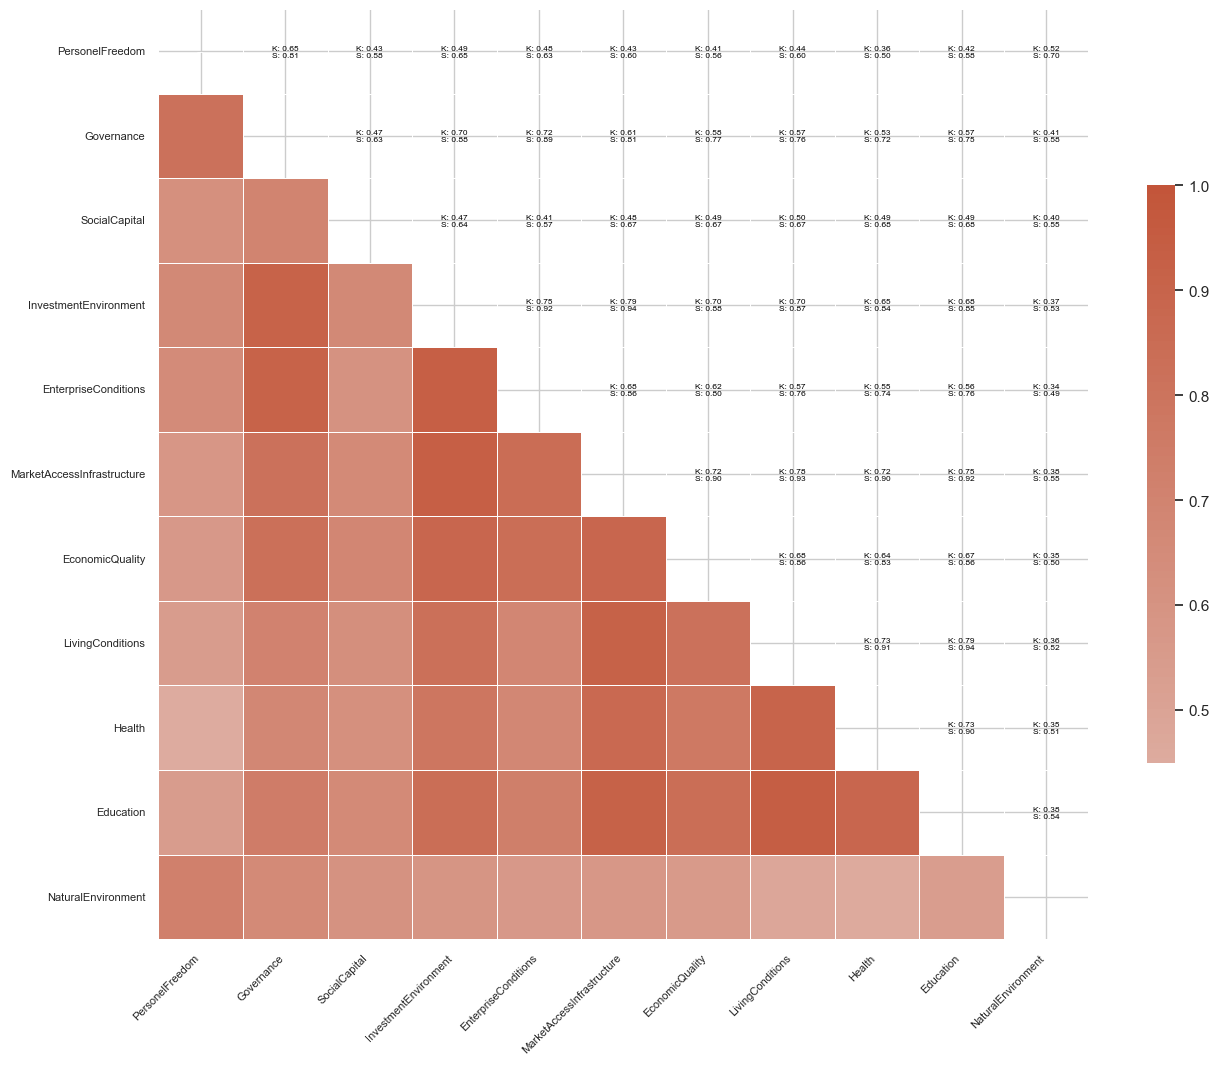

In [187]:
# Assuming your correlation matrices are stored in a dictionary called 'correlations'
pearson_corr = correlations['pearson']
kendall_corr = correlations['kendall']
spearman_corr = correlations['spearman']

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(pearson_corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(pearson_corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f",
            annot_kws={"size": 8})

# Overlay Kendall and Spearman correlations as text annotations
for i in range(pearson_corr.shape[0]):
    for j in range(i+1, pearson_corr.shape[1]):
        ax.text(j+0.5, i+0.5, f'K: {kendall_corr.iloc[i, j]:.2f}\nS: {spearman_corr.iloc[i, j]:.2f}',
                ha='center', va='center', fontsize=6, color='black')

plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(fontsize=8)

plt.show()


In [188]:
# WORLD MAP VISUALIZATION OF AVERAGE SCORES

# pip install geopandas
# pip3 install adjustText 


In [189]:
import geopandas as gpd

# Load the world dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Access the 'name' column
country_names = world['name']

# Display the country names
print(country_names)


0                          Fiji
1                      Tanzania
2                     W. Sahara
3                        Canada
4      United States of America
                 ...           
172                      Serbia
173                  Montenegro
174                      Kosovo
175         Trinidad and Tobago
176                    S. Sudan
Name: name, Length: 177, dtype: object


In [190]:
df['Country']

0                        Denmark
1                         Sweden
2                         Norway
3                        Finland
4                    Switzerland
                 ...            
162                      Somalia
163                  Afghanistan
164     Central African Republic
165                        Yemen
166                  South Sudan
Name: Country, Length: 167, dtype: object

In [191]:

# Trim whitespace from the 'Country' column
df['Country'] = df['Country'].str.strip()

# Define a mapping for country name replacements
country_replacements = {
    "United States of America": "United States",
    "South Korea": "Korea",
    "North Korea": "Dem. Rep. Korea",
    "Ivory Coast": "Côte d'Ivoire",
    "Czech Republic": "Czech Rep.",
    "Dominican Republic": "Dominican Rep.",
    "Bosnia and Herzegovina": "Bosnia and Herz.",
    "Cabo Verde": "Cape Verde",
    "São Tomé and Príncipe": "São Tomé and Principe",
    "Equatorial Guinea": "Eq. Guinea",
    "Democratic Republic of Congo": "Dem. Rep. Congo",
    "Central African Republic": "Central African Rep.",
    "South Sudan": "S. Sudan",
    "Laos": "Lao PDR"
}

# Replace country names using the defined mapping
df['Country'] = df['Country'].replace(country_replacements)

# Save the modified DataFrame back to a CSV file (optional)
df.to_csv('modified_data.csv', index=False)

# Display the modified DataFrame (optional)
print(df)


                  Country  AveragScore  SafetySecurity  PersonelFreedom  \
0                 Denmark        84.55           92.59            94.09   
1                  Sweden        83.67           90.97            91.90   
2                  Norway        83.59           93.30            94.10   
3                 Finland        83.47           89.56            91.96   
4             Switzerland        83.42           95.66            87.50   
..                    ...          ...             ...              ...   
162               Somalia        34.39           31.91            34.32   
163           Afghanistan        34.18           20.93            31.02   
164  Central African Rep.        32.83           35.30            36.83   
165                 Yemen        32.65           22.60            25.30   
166              S. Sudan        30.40           16.54            26.98   

     Governance  SocialCapital  InvestmentEnvironment  EnterpriseConditions  \
0         89.45     

In [192]:
from matplotlib.colors import ListedColormap, Normalize

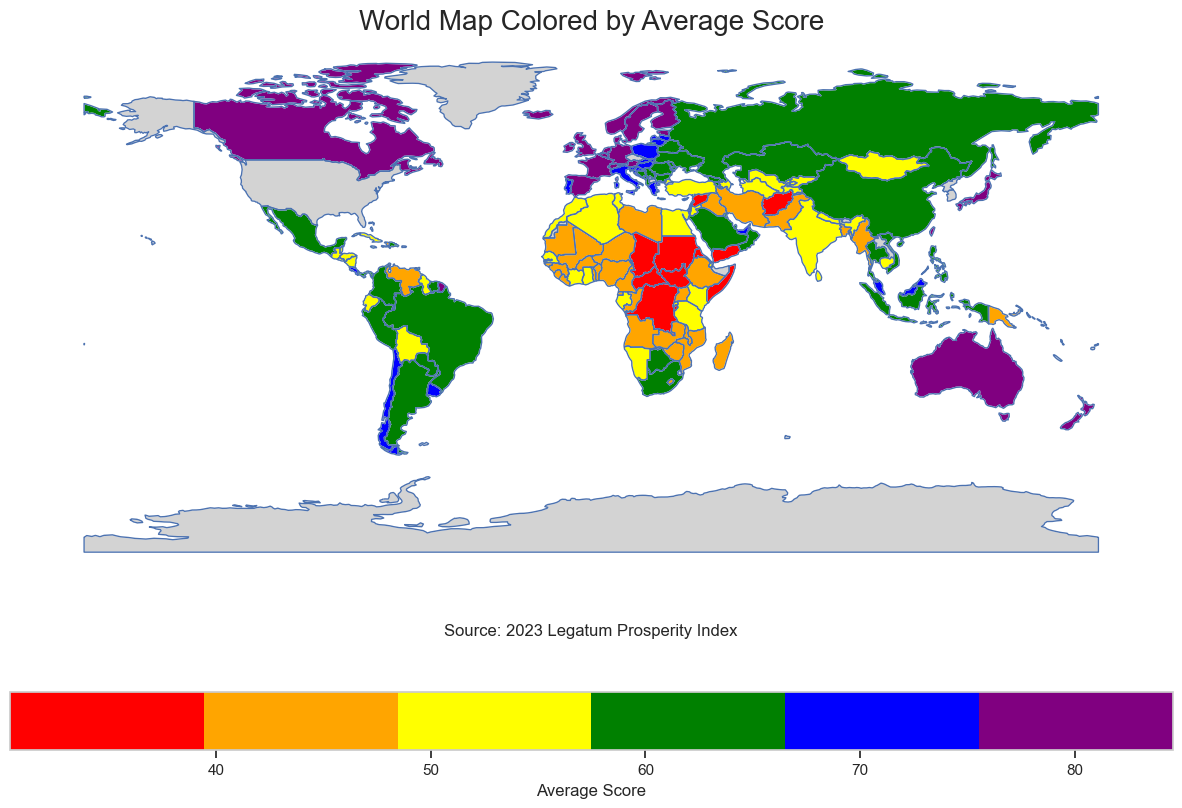

In [193]:
# Load the world dataset
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Load your data (assuming it's in a CSV file)
new_data = pd.read_csv('modified_data.csv')

# Trim whitespace from the 'Country' column
new_data['Country'] = new_data['Country'].str.strip()

# Define a mapping for country name replacements
country_replacements = {
    "United States of America": "United States",
    "South Korea": "Korea",
    "North Korea": "Dem. Rep. Korea",
    "Ivory Coast": "Côte d'Ivoire",
    "Czech Republic": "Czech Rep.",
    "Dominican Republic": "Dominican Rep.",
    "Bosnia and Herzegovina": "Bosnia and Herz.",
    "Cabo Verde": "Cape Verde",
    "São Tomé and Príncipe": "São Tomé and Principe",
    "Equatorial Guinea": "Eq. Guinea",
    "Democratic Republic of Congo": "Dem. Rep. Congo",
    "Central African Republic": "Central African Rep.",
    "South Sudan": "S. Sudan",
    "Laos": "Lao PDR"
}

# Replace country names using the defined mapping
new_data['Country'] = new_data['Country'].replace(country_replacements)

# Merge the world GeoDataFrame with your data
world_data = world.merge(new_data, left_on="name", right_on="Country", how="left")

# Set up the color palette and normalization
colors = ["red", "orange", "yellow", "green", "blue", "purple"]
cmap = ListedColormap(colors)
norm = Normalize(vmin=new_data['AveragScore'].min(), vmax=new_data['AveragScore'].max())

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the world map
world_data.boundary.plot(ax=ax, linewidth=1)
world_data.plot(column='AveragScore', ax=ax, legend=True,
                legend_kwds={'label': "Average Score",
                             'orientation': "horizontal"},
                cmap=cmap, norm=norm, missing_kwds={"color": "lightgrey"})

# Add titles and captions
ax.set_title("World Map Colored by Average Score", fontdict={'fontsize': 20}, loc='center')
ax.text(0.5, -0.1, "Source: 2023 Legatum Prosperity Index", ha='center', va='center', transform=ax.transAxes, fontsize=12)
plt.axis('off')

plt.show()


In [194]:
data.head()

SafetySecurity  PersonelFreedom  Governance  SocialCapital  \
Country                                                                     
 Denmark                92.59            94.09       89.45          82.56   
 Sweden                 90.97            91.90       86.41          78.29   
 Norway                 93.30            94.10       89.66          79.03   
 Finland                89.56            91.96       90.41          77.27   
  Switzerland           95.66            87.50       87.67          69.14   

               InvestmentEnvironment  EnterpriseConditions  \
Country                                                      
 Denmark                       82.42                 79.64   
 Sweden                        82.81                 75.54   
 Norway                        82.24                 75.95   
 Finland                       84.12                 77.25   
  Switzerland                  80.81                 83.84   

               MarketAccessInfrastructure  EconomicQuality  LivingConditions  \
Country                                                                        
 Denmark                            78.79            76.81             95.77   
 Sweden                             79.67            76.18             95.33   
 Norway                             75.87            77.25             94.70   
 Finland                            78.77            70.28             94.46   
  Switzerland                       78.65            79.71             94.66   

               Health  Education  NaturalEnvironment  
Country                                               
 Denmark        81.07      87.48               73.94  
 Sweden         82.28      85.92               78.74  
 Norway         82.98      85.68               72.37  
 Finland        81.19      88.38               77.99  
  Switzerland   82.11      87.72               73.60

In [195]:
# Trim whitespace from the 'Country' column and set it as the index
# data['Country'] = data['Country'].str.strip()
# data.set_index('Country', inplace=True)


# Select the relevant columns (assuming columns 2 to 13 in R corresponds to columns 1 to 12 in Python)
data = data.iloc[:, 1:13]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Perform PCA
pca = PCA(n_components=2)
scaled_pca_data = pca.fit_transform(scaled_data)

# Convert the PCA result to a DataFrame for easier handling
scaled_pca_df = pd.DataFrame(scaled_pca_data, index=data.index, columns=['PC1', 'PC2'])

# Display the PCA-transformed data
print(scaled_pca_df)

                                PC1       PC2
Country                                      
 Denmark                   5.878393 -1.366256
 Sweden                    5.724241 -1.419458
 Norway                    5.610401 -1.208246
 Finland                   5.655695 -1.494620
  Switzerland              5.551736 -0.887486
...                             ...       ...
 Somalia                  -4.923761 -0.787723
 Afghanistan              -4.813507  0.127809
 Central African Republic -5.354351 -1.776483
 Yemen                    -5.125586  0.542026
 South Sudan              -5.534786 -0.949834

[167 rows x 2 columns]


In [196]:
# from yellowbrick.cluster import KElbowVisualizer

OPTIMAL NUMBER OF CLUSTERS FOR K-MEANS

Elbow Method

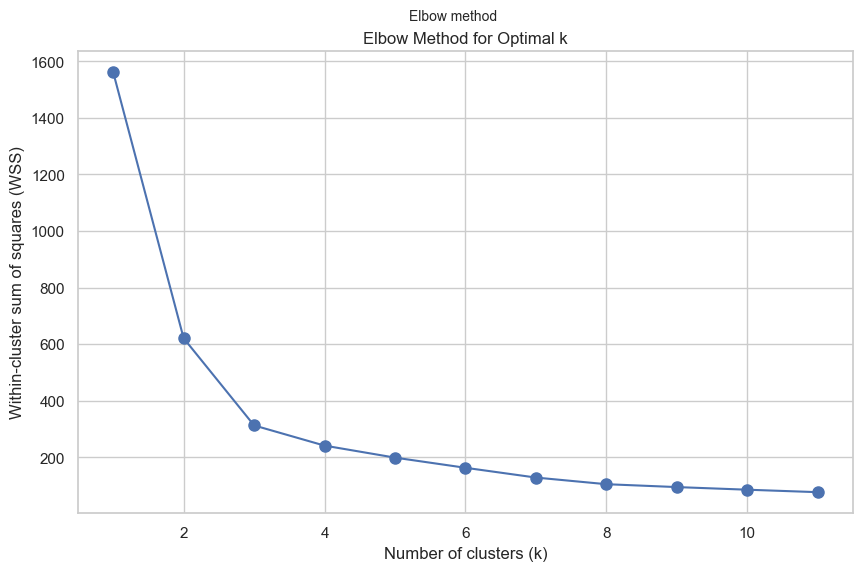

In [197]:
# Determine the optimal number of clusters using the elbow method
wss = []
k_range = range(1, 12)
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=25)
    kmeans.fit(scaled_pca_df)
    wss.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(k_range, wss, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster sum of squares (WSS)')
plt.title('Elbow Method for Optimal k')
plt.suptitle('Elbow method', fontsize=10, y=0.95)
plt.grid(True)
plt.show()


Silhouette Method

In [198]:
from sklearn.metrics import silhouette_score

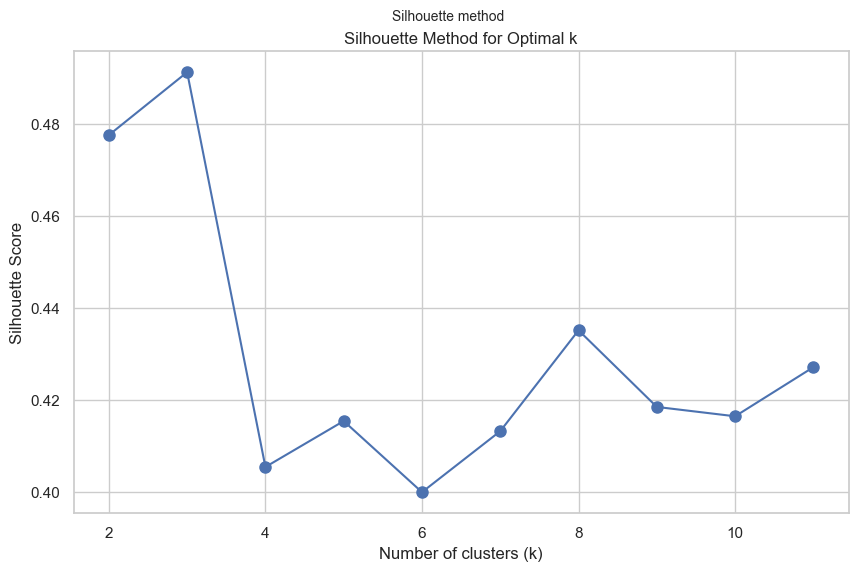

In [199]:
silhouette_scores = []
k_range = range(2, 12)
for k in k_range:
    kmeans = KMeans(n_clusters=k, n_init=25, random_state=42)
    kmeans.fit(scaled_pca_df)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(scaled_pca_df, labels))

# Plot the silhouette method
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.suptitle('Silhouette method', fontsize=10, y=0.95)
plt.grid(True)
plt.show()

Gap Statistic Method

In [200]:
#from gap_statistic import OptimalK # pip install pandas scikit-learn matplotlib gap-stat
from kneed import KneeLocator

In [201]:
# Calculate the gap statistic
'''optimalK = OptimalK(parallel_backend='joblib')
n_clusters = optimalK(scaled_pca_df, cluster_array=np.arange(1, 12))

# Plot the gap statistic
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, 12), optimalK.gap_df.gap_value, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic Method for Optimal k')
plt.suptitle('Gap statistic method', fontsize=10, y=0.95)
plt.grid(True)
plt.show()'''

"optimalK = OptimalK(parallel_backend='joblib')\nn_clusters = optimalK(scaled_pca_df, cluster_array=np.arange(1, 12))\n\n# Plot the gap statistic\nplt.figure(figsize=(10, 6))\nplt.plot(np.arange(1, 12), optimalK.gap_df.gap_value, 'bo-', markersize=8)\nplt.xlabel('Number of clusters (k)')\nplt.ylabel('Gap Statistic')\nplt.title('Gap Statistic Method for Optimal k')\nplt.suptitle('Gap statistic method', fontsize=10, y=0.95)\nplt.grid(True)\nplt.show()"

In [202]:
def optimalK(data, nrefs=3, maxClusters=15):
    """
    Calculates KMeans optimal K using Gap Statistic from Tibshirani, Walther, Hastie
    Params:
        data: nd-array of shape (n_samples, n_features)
        nrefs: number of reference datasets to generate
        maxClusters: Maximum number of clusters to test for
    Returns: (gaps, optimalK)
    """
    gaps = np.zeros((len(range(1, maxClusters+1)),))
    results_list = []
    
    for k in range(1, maxClusters+1):
        # Holder for reference dispersion results
        refDisps = np.zeros(nrefs)
        
        # For n references, generate random sample and perform kmeans getting resulting dispersion of each
        for i in range(nrefs):
            # Create new random reference set
            randomReference = np.random.random_sample(size=data.shape)
            
            # Fit to it
            km = KMeans(k)
            km.fit(randomReference)
            
            refDisp = km.inertia_
            refDisps[i] = refDisp
        
        # Fit cluster to original data and create dispersion
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_
        
        # Calculate gap statistic
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
        
        # Assign this loop's gap statistic to gaps
        gaps[k-1] = gap
        
        results_list.append({'clusterCount': k, 'gap': gap})
    
    resultsdf = pd.DataFrame(results_list)
    
    return (gaps, resultsdf)

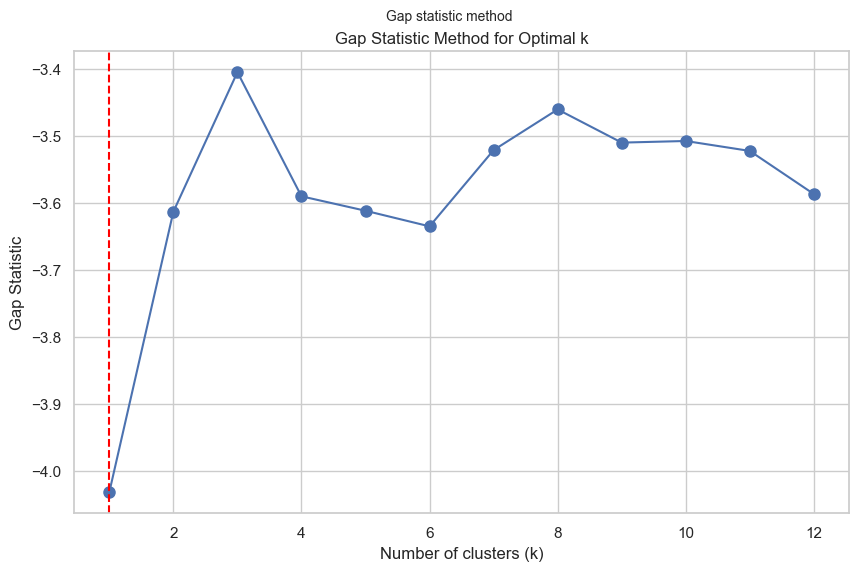

The optimal number of clusters is: 1


In [203]:
# Calculate the gap statistic
gaps, resultsdf = optimalK(scaled_pca_df, nrefs=500, maxClusters=12)

# Find the optimal number of clusters using the KneeLocator
knee = KneeLocator(range(1, 13), gaps, curve='convex', direction='decreasing')

# Plot the gap statistic
plt.figure(figsize=(10, 6))
plt.plot(range(1, 13), gaps, 'bo-', markersize=8)
plt.axvline(knee.knee, color='red', linestyle='--')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistic Method for Optimal k')
plt.suptitle('Gap statistic method', fontsize=10, y=0.95)
plt.grid(True)
plt.show()

print(f'The optimal number of clusters is: {knee.knee}')


K menas for 3 Cluster

In [204]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

from sklearn.covariance import EllipticEnvelope

from scipy.spatial import ConvexHull

In [205]:
# K-means clustering
kmeans = KMeans(n_clusters=3, n_init=25)
kmeans.fit(scaled_pca_data)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

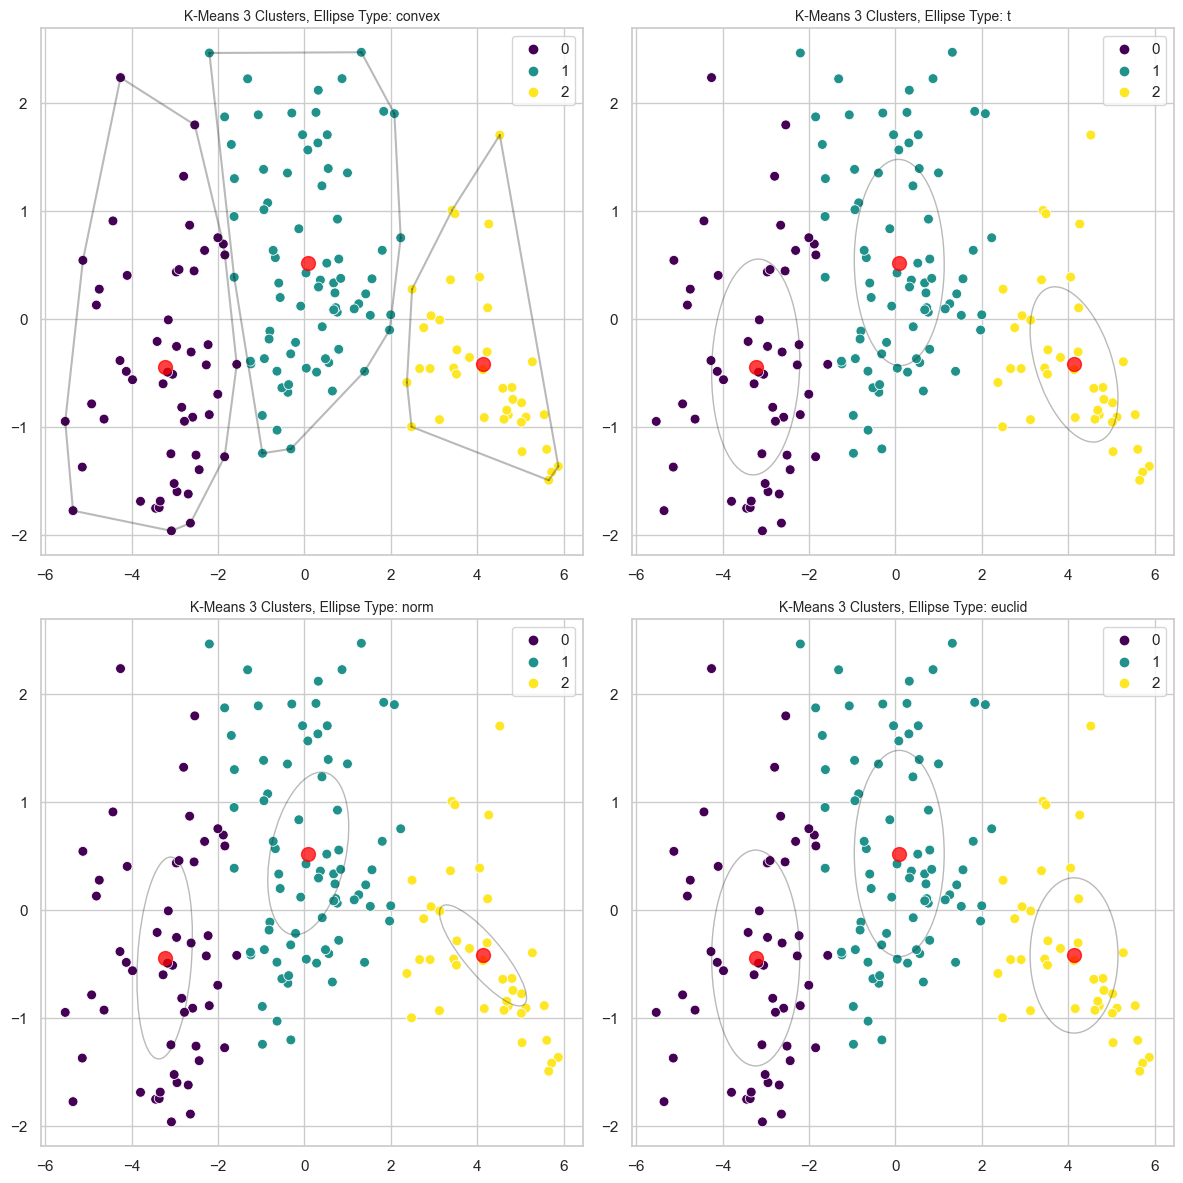

In [206]:
# Function to draw an ellipse
def draw_ellipse(ax, center, width, height, angle, **kwargs):
    ell = Ellipse(xy=center, width=width, height=height, angle=angle, **kwargs)
    ax.add_patch(ell)

# Create subplots for different ellipse types
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
ellipse_types = ['convex', 't', 'norm', 'euclid']
k_3plots = []

for ax, etype in zip(axes.flatten(), ellipse_types):
    sns.scatterplot(x=scaled_pca_data[:, 0], y=scaled_pca_data[:, 1], hue=labels, palette='viridis', ax=ax, s=50)
    ax.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.75)
    ax.set_title(f'K-Means 3 Clusters, Ellipse Type: {etype}', fontsize=10)
    
    # Plot ellipses
    for i, (pos, cov) in enumerate(zip(centers, [np.cov(scaled_pca_data[labels == j].T) for j in range(3)])):
        if etype == 'convex':
            points = scaled_pca_data[labels == i]
            hull = ConvexHull(points)
            for simplex in hull.simplices:
                ax.plot(points[simplex, 0], points[simplex, 1], 'k-', alpha=0.3)
        elif etype == 't' or etype == 'norm':
            if etype == 'norm':
                envelope = EllipticEnvelope()
                envelope.fit(scaled_pca_data[labels == i])
                cov = envelope.covariance_
            U, s, Vt = np.linalg.svd(cov)
            angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
            width, height = 2 * np.sqrt(s)
            draw_ellipse(ax, pos, width, height, angle, alpha=0.3, facecolor='none', edgecolor='k')
        elif etype == 'euclid':
            cov = np.diag(np.diag(cov))
            U, s, Vt = np.linalg.svd(cov)
            angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
            width, height = 2 * np.sqrt(s)
            draw_ellipse(ax, pos, width, height, angle, alpha=0.3, facecolor='none', edgecolor='k')

plt.tight_layout()
plt.show()

In [207]:
# K-means clustering with 7 clusters
kmeans = KMeans(n_clusters=7, n_init=25)
kmeans.fit(scaled_pca_data)
labels = kmeans.labels_
centers = kmeans.cluster_centers_

In [208]:
# # Example data or placeholders for illustration
# scaled_pca_data = np.random.rand(100, 2)  # Replace with your actual data
# labels = np.random.randint(0, 7, size=100)  # Replace with your actual labels
# centers = np.random.rand(7, 2)  # Replace with your actual centers

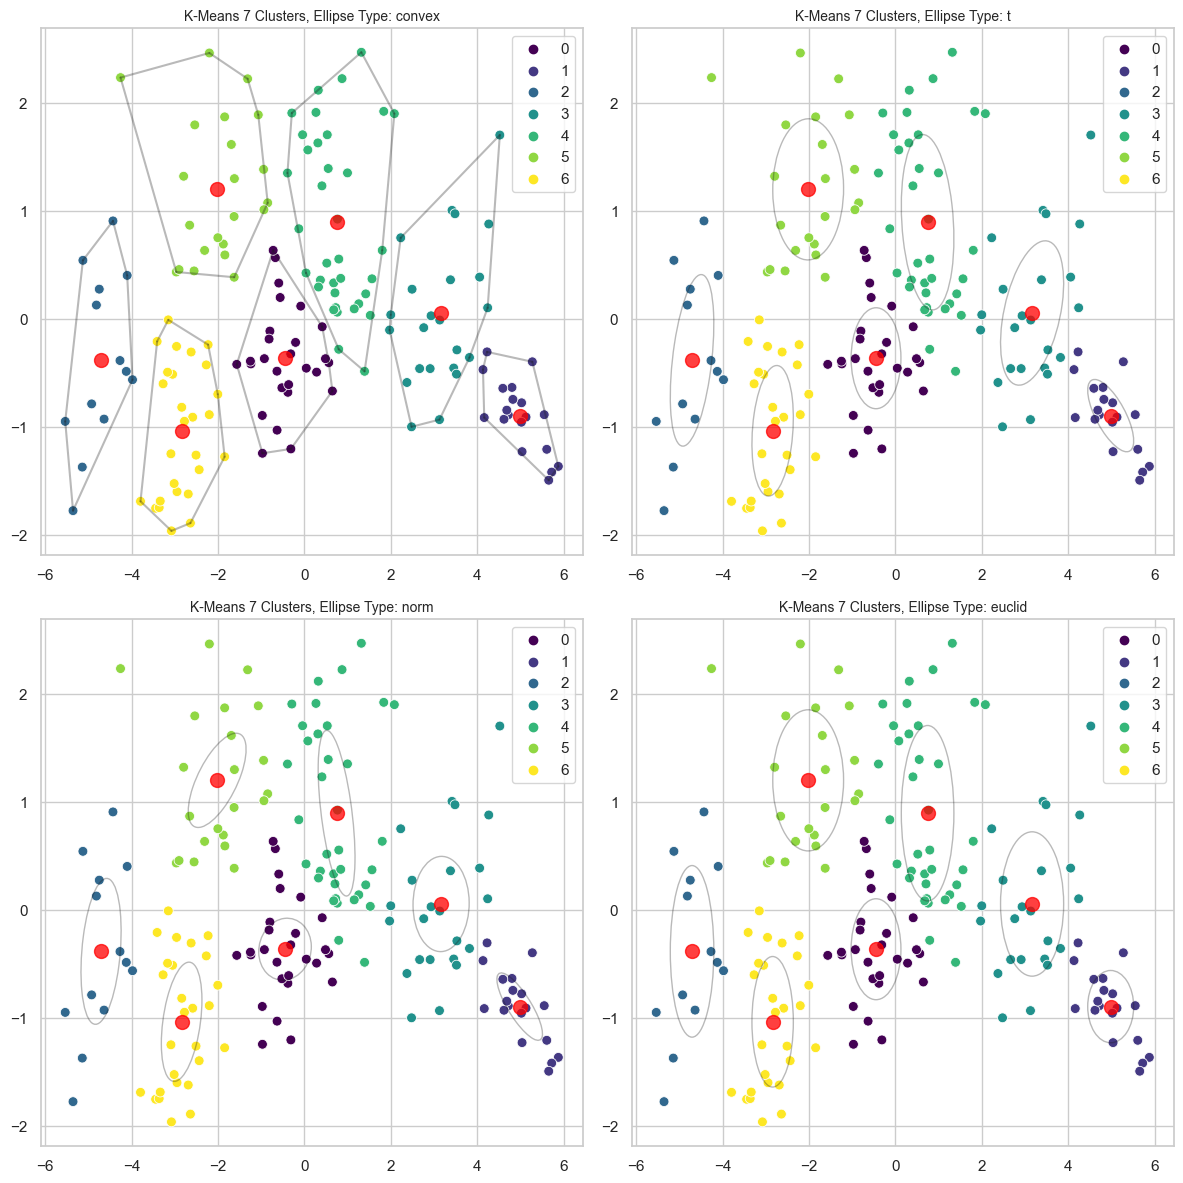

In [209]:
# Function to draw an ellipse
def draw_ellipse(ax, center, width, height, angle, **kwargs):
    ell = Ellipse(xy=center, width=width, height=height, angle=angle, **kwargs)
    ax.add_patch(ell)

# Create subplots for different ellipse types
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
ellipse_types = ['convex', 't', 'norm', 'euclid']
k_7plots = []

for ax, etype in zip(axes.flatten(), ellipse_types):
    sns.scatterplot(x=scaled_pca_data[:, 0], y=scaled_pca_data[:, 1], hue=labels, palette='viridis', ax=ax, s=50)
    ax.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.75)
    ax.set_title(f'K-Means 7 Clusters, Ellipse Type: {etype}', fontsize=10)
    
    # Plot ellipses
    for i, (pos, cov) in enumerate(zip(centers, [np.cov(scaled_pca_data[labels == j].T) for j in range(7)])):
        if etype == 'convex':
            points = scaled_pca_data[labels == i]
            hull = ConvexHull(points)
            for simplex in hull.simplices:
                ax.plot(points[simplex, 0], points[simplex, 1], 'k-', alpha=0.3)
        elif etype == 't' or etype == 'norm':
            if etype == 'norm':
                envelope = EllipticEnvelope()
                envelope.fit(scaled_pca_data[labels == i])
                cov = envelope.covariance_
            U, s, Vt = np.linalg.svd(cov)
            angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
            width, height = 2 * np.sqrt(s)
            draw_ellipse(ax, pos, width, height, angle, alpha=0.3, facecolor='none', edgecolor='k')
        elif etype == 'euclid':
            cov = np.diag(np.diag(cov))
            U, s, Vt = np.linalg.svd(cov)
            
            #U = np.array([[0.707, 0.707],[-0.707, 0.707]])
            # Calculate angle
            #angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
            
            angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
            width, height = 2 * np.sqrt(s)
            draw_ellipse(ax, pos, width, height, angle, alpha=0.3, facecolor='none', edgecolor='k')

plt.tight_layout()
plt.show()

In [210]:
# Assuming 'data' is your Pandas DataFrame
# Example data
np.random.seed(0)
# data = pd.DataFrame({
#     'Feature1': np.random.rand(100),
#     'Feature2': np.random.rand(100),
#     'Feature3': np.random.rand(100),
#     'Feature4': np.random.rand(100),
#     'Cluster': np.random.randint(0, 3, size=100)  # Replace with your actual clusters
# })

# Assuming 'km_res_3' is your KMeans clustering result
# Example KMeans clustering
km_res_3 = KMeans(n_clusters=3, random_state=0)
clusters = km_res_3.fit_predict(data) # [['Feature1', 'Feature2', 'Feature3', 'Feature4']]
data['Cluster'] = clusters

# Summary statistics
summary_stats = data.describe()

# Aggregation by cluster
agg_mean = data.groupby('Cluster').agg('mean')
agg_sd = data.groupby('Cluster').agg('std')

print("Summary Statistics:")
print(summary_stats)

print("\nAggregation - Mean by Cluster:")
print(agg_mean)

print("\nAggregation - Standard Deviation by Cluster:")
print(agg_sd)

Summary Statistics:
       PersonelFreedom  Governance  SocialCapital  InvestmentEnvironment  \
count       167.000000  167.000000     167.000000             167.000000   
mean         56.829401   50.360299      54.468024              53.013653   
std          19.914638   17.747092      10.350639              16.743723   
min          16.160000   13.090000      23.010000              21.690000   
25%          39.650000   37.470000      47.820000              40.765000   
50%          57.170000   47.510000      54.390000              51.250000   
75%          72.865000   60.965000      60.610000              64.640000   
max          94.100000   90.410000      82.560000              84.990000   

       EnterpriseConditions  MarketAccessInfrastructure  EconomicQuality  \
count            167.000000                  167.000000       167.000000   
mean              54.791677                   55.019701        51.568683   
std               12.876166                   15.849004        13.4

In [213]:
df.head()

Country  AveragScore  SafetySecurity  PersonelFreedom  Governance  \
0      Denmark        84.55           92.59            94.09       89.45   
1       Sweden        83.67           90.97            91.90       86.41   
2       Norway        83.59           93.30            94.10       89.66   
3      Finland        83.47           89.56            91.96       90.41   
4  Switzerland        83.42           95.66            87.50       87.67   

   SocialCapital  InvestmentEnvironment  EnterpriseConditions  \
0          82.56                  82.42                 79.64   
1          78.29                  82.81                 75.54   
2          79.03                  82.24                 75.95   
3          77.27                  84.12                 77.25   
4          69.14                  80.81                 83.84   

   MarketAccessInfrastructure  EconomicQuality  LivingConditions  Health  \
0                       78.79            76.81             95.77   81.07   
1                       79.67            76.18             95.33   82.28   
2                       75.87            77.25             94.70   82.98   
3                       78.77            70.28             94.46   81.19   
4                       78.65            79.71             94.66   82.11   

   Education  NaturalEnvironment  
0      87.48               73.94  
1      85.92               78.74  
2      85.68               72.37  
3      88.38               77.99  
4      87.72               73.60

K-MEANS CLUSTERING RESULTS ON WORLD MAP

In [216]:
from matplotlib.colors import ListedColormap, Normalize

In [223]:
new_data = pd.read_csv('modified_data.csv')
new_data.head()

Country  AveragScore  SafetySecurity  PersonelFreedom  Governance  \
0      Denmark        84.55           92.59            94.09       89.45   
1       Sweden        83.67           90.97            91.90       86.41   
2       Norway        83.59           93.30            94.10       89.66   
3      Finland        83.47           89.56            91.96       90.41   
4  Switzerland        83.42           95.66            87.50       87.67   

   SocialCapital  InvestmentEnvironment  EnterpriseConditions  \
0          82.56                  82.42                 79.64   
1          78.29                  82.81                 75.54   
2          79.03                  82.24                 75.95   
3          77.27                  84.12                 77.25   
4          69.14                  80.81                 83.84   

   MarketAccessInfrastructure  EconomicQuality  LivingConditions  Health  \
0                       78.79            76.81             95.77   81.07   
1                       79.67            76.18             95.33   82.28   
2                       75.87            77.25             94.70   82.98   
3                       78.77            70.28             94.46   81.19   
4                       78.65            79.71             94.66   82.11   

   Education  NaturalEnvironment  
0      87.48               73.94  
1      85.92               78.74  
2      85.68               72.37  
3      88.38               77.99  
4      87.72               73.60

       Country  AveragScore  SafetySecurity  PersonelFreedom  Governance  \
0      Denmark        84.55           92.59            94.09       89.45   
1       Sweden        83.67           90.97            91.90       86.41   
2       Norway        83.59           93.30            94.10       89.66   
3      Finland        83.47           89.56            91.96       90.41   
4  Switzerland        83.42           95.66            87.50       87.67   

   SocialCapital  InvestmentEnvironment  EnterpriseConditions  \
0          82.56                  82.42                 79.64   
1          78.29                  82.81                 75.54   
2          79.03                  82.24                 75.95   
3          77.27                  84.12                 77.25   
4          69.14                  80.81                 83.84   

   MarketAccessInfrastructure  EconomicQuality  LivingConditions  Health  \
0                       78.79            76.81             95.77   81.07   


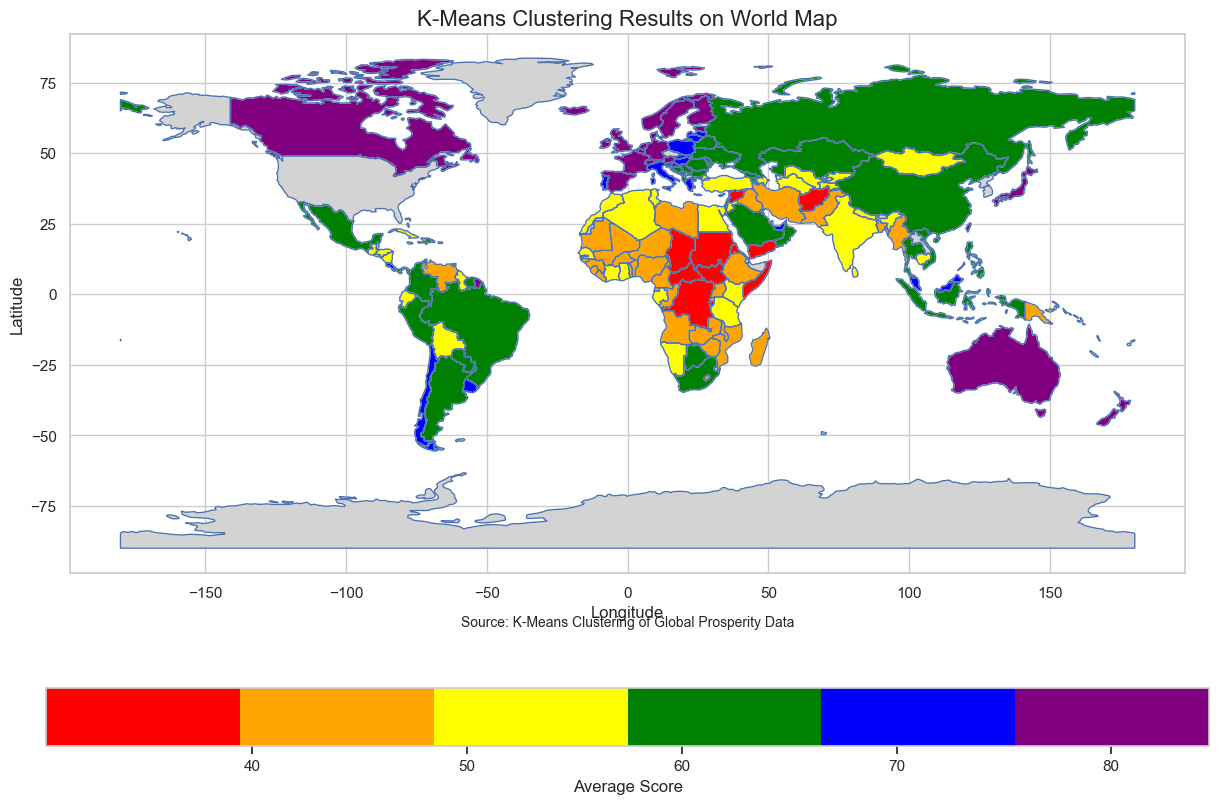

In [231]:
# Load the world dataset using geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Load your data (assuming it's in a CSV file)
new_data = pd.read_csv('modified_data.csv')

# Trim whitespace from the 'Country' column
new_data['Country'] = new_data['Country'].str.strip()

# Define a mapping for country name replacements
country_replacements = {
    "United States of America": "United States",
    "South Korea": "Korea",
    "North Korea": "Dem. Rep. Korea",
    "Ivory Coast": "Côte d'Ivoire",
    "Czech Republic": "Czech Rep.",
    "Dominican Republic": "Dominican Rep.",
    "Bosnia and Herzegovina": "Bosnia and Herz.",
    "Cabo Verde": "Cape Verde",
    "São Tomé and Príncipe": "São Tomé and Principe",
    "Equatorial Guinea": "Eq. Guinea",
    "Democratic Republic of Congo": "Dem. Rep. Congo",
    "Central African Republic": "Central African Rep.",
    "South Sudan": "S. Sudan",
    "Laos": "Lao PDR"
}

# Replace country names using the defined mapping
new_data['Country'] = new_data['Country'].replace(country_replacements)

print(new_data.head())
# Perform KMeans clustering
km_res = KMeans(n_clusters=3, random_state=0)
clusters = km_res.fit_predict(new_data.iloc[:,1:13])  # Replace with your actual features
new_data['Cluster'] = clusters

# Merge the world GeoDataFrame with your data based on country names
world_data = world.merge(new_data, left_on="name", right_on="Country", how="left")

# Set up the color palette and normalization
colors = ["red", "orange", "yellow", "green", "blue", "purple"]  # Adjust as needed
cmap = ListedColormap(colors)
norm = Normalize(vmin=new_data['AveragScore'].min(), vmax=new_data['AveragScore'].max())

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the world map boundaries
world_data.boundary.plot(ax=ax, linewidth=1)

# # Plot the world map colored by Average Score
world_data.plot(column='AveragScore', ax=ax, legend=True,
                legend_kwds={'label': "Average Score",
                             'orientation': "horizontal"},
                cmap=cmap, norm=norm, missing_kwds={"color": "lightgrey"})

# # Add titles and captions
# ax.set_title("K-Means Clustering Results on World Map", fontdict={'fontsize': 20}, loc='center')
# ax.text(0.5, -0.1, "Source: K-Means Clustering of Global Prosperity Data", ha='center', va='center', transform=ax.transAxes, fontsize=12)
# plt.axis('off')
# plt.show()


# Set title and labels
ax.set_title('K-Means Clustering Results on World Map', fontsize=16)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

# Add source caption
plt.annotate('Source: K-Means Clustering of Global Prosperity Data', 
             xy=(0.5, -0.1), xycoords='axes fraction', ha='center', fontsize=10)

plt.show()